In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import multivariate_normal
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv("sample_data/23.csv")
df

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
f_1,937.0,81.588047,6.497673e+01,1.00,31.00,64.00,124.00,352.00
f_2,937.0,332.842049,1.931939e+03,10.00,20.00,65.00,132.00,32389.00
f_3,937.0,698.707086,5.999656e+02,1.92,85.27,704.37,1223.48,1893.08
f_4,937.0,870.992209,5.227993e+02,1.00,444.20,761.28,1260.37,2724.57
f_5,937.0,84.121665,4.536177e+01,0.00,54.00,73.00,117.00,180.00
f_6,937.0,769696.378869,3.831151e+06,70312.00,125000.00,186300.00,330468.00,71315000.00
f_7,937.0,43.242721,1.271840e+01,21.24,33.65,39.97,52.42,82.64
f_8,937.0,9.127887,3.588878e+00,0.83,6.75,8.20,10.76,24.69
f_9,937.0,3940.712914,8.167428e+03,667.00,1371.00,2090.00,3435.00,160740.00
f_10,937.0,0.221003,9.031555e-02,0.02,0.16,0.20,0.26,0.74


# Oil Spill Detection Using Satellite Image Features

## 1. Introduction
This project involves training machine learning models to classify ocean image patches as containing an oil spill or not. The dataset consists of feature vectors extracted from satellite images.

---

 Data Preprocessing & Feature Engineering

In [4]:
# Checking Null values
print(df.isnull().sum())

f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64


In [5]:
# Checking Duplicates
df.duplicated().any()

np.False_

**CLASS DISTRIBUTION IN TARGET VARIABLE**

Text(0.5, 1.0, 'Percentage of each class')

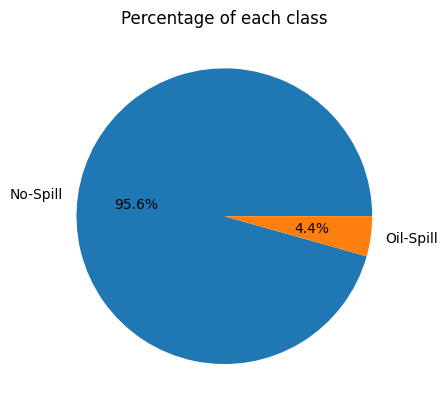

In [6]:
plt.pie(df['target'].value_counts(), labels=['No-Spill','Oil-Spill'], autopct='%0.1f%%', radius=1)
plt.title("Percentage of each class")

target
0    896
1     41
Name: count, dtype: int64


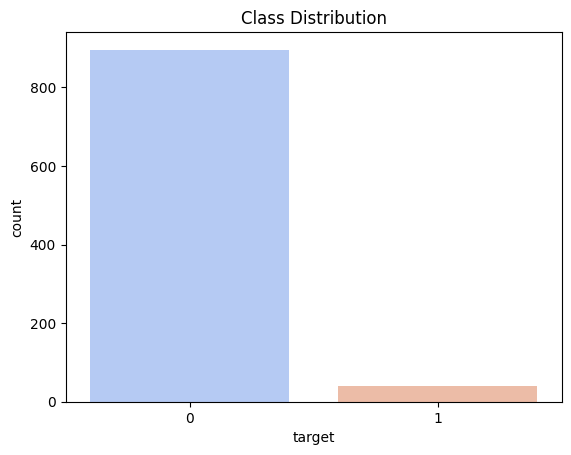

In [7]:
print(df['target'].value_counts())
sns.countplot(x=df['target'], palette='coolwarm', hue=df['target'], legend=False)
plt.title('Class Distribution')
plt.show()

#### Correlation between the features

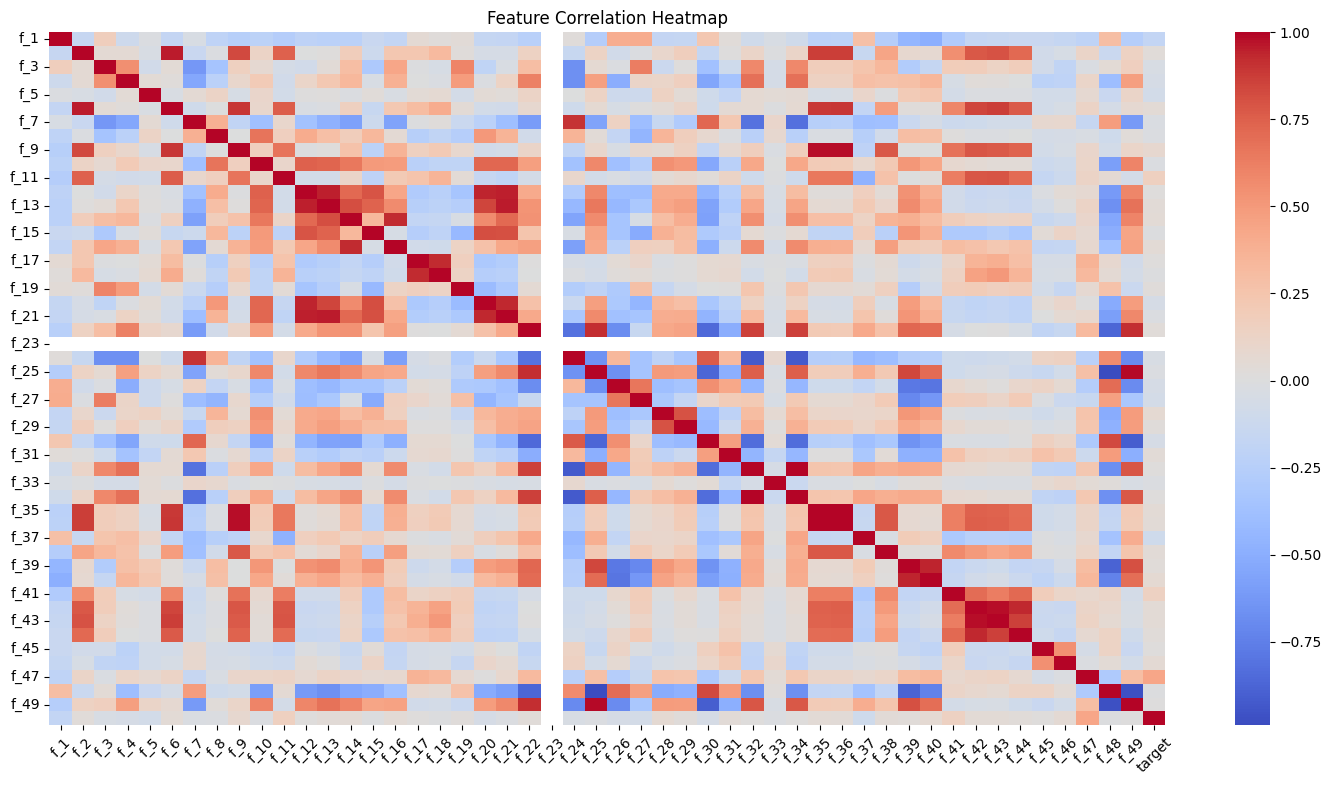

In [8]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()


In [9]:
X = df.drop(columns=['target'])
y = df['target']

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### Using SMOTE to balance Spill and Non-spill data

In [12]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

target
0    626
1    626
Name: count, dtype: int64


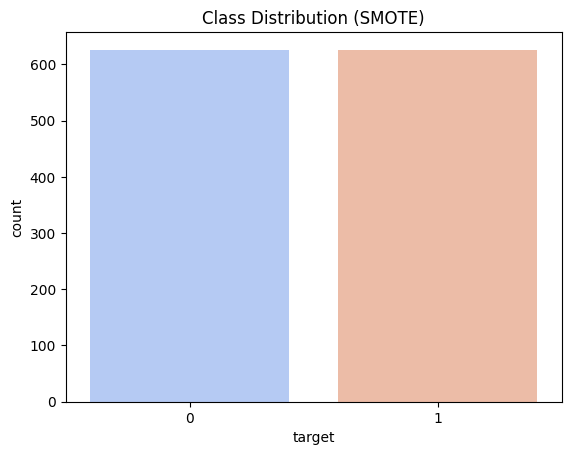

In [13]:
print(y_train_smote.value_counts())
sns.countplot(x=y_train_smote, palette='coolwarm', hue=y_train_smote, legend=False)
plt.title('Class Distribution (SMOTE)')
plt.show()

#### Using Undersampling to balance Spill and Non-Spill data

In [14]:
rus = RandomUnderSampler(random_state=42)
X_under_train, y_under_train = rus.fit_resample(X_train_scaled, y_train)

target
0    29
1    29
Name: count, dtype: int64


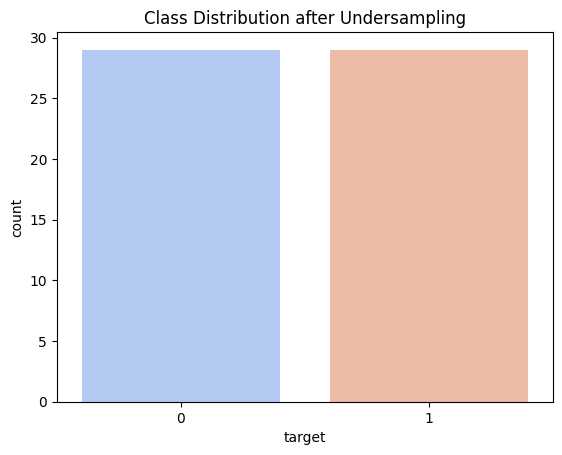

In [15]:
print(y_under_train.value_counts())
sns.countplot(x=y_under_train, palette='coolwarm', hue=y_under_train, legend=False)
plt.title('Class Distribution after Undersampling')
plt.show()

#### Using Random Oversampling to balance Spill and Non-Spill data

In [16]:
ROS = RandomOverSampler(random_state=42)
X_over_train, y_over_train = ROS.fit_resample(X_train_scaled, y_train)

target
0    626
1    626
Name: count, dtype: int64


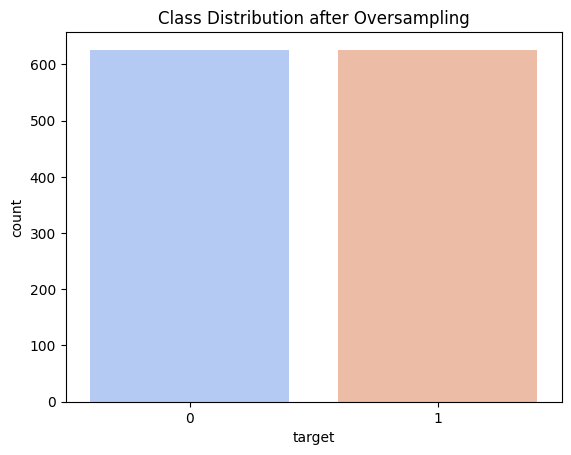

In [17]:
print(y_over_train.value_counts())
sns.countplot(x=y_over_train, palette='coolwarm', hue=y_over_train, legend=False)
plt.title('Class Distribution after Oversampling')
plt.show()

### Evaluation metrics: Accuracy, Precision, Recall, F1-score, ROC-AUC, Confusion Matrix.

In [18]:
def compute_eer (y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    eer = fpr[np.nanargmin(np.absolute((1 - tpr) - fpr))]
    return eer

In [19]:
models = []
accuracy_smote = []
models_undersampling = []
accuracy_undersampling = []
models_oversampling = []
accuracy_oversampling = []
f1_smote = []
f1_undersampling = []
f1_oversampling = []
precision_smote = []
precision_undersampling = []
precision_oversampling = []
recall_smote = []
recall_undersampling = []
recall_oversampling = []
fpr_smote = []
tpr_smote = []
auc_smote = []
eer_smote = []
eer_undersampling = []
eer_oversampling = []
fpr_oversampling = []
tpr_oversampling = []

Model evaluate function  for Data balanced using SMOTE

In [20]:
def model_evaluate(model, model_name):
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_val_scaled)
    if hasattr(model, 'predict_proba'):
      y_prob = model.predict_proba(X_val_scaled)[:,1]
    else:
      decision_scores = model.decision_function(X_val_scaled)
      y_prob = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())

    acc = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    # roc_auc = roc_auc_score(y_val, y_prob) if y_prob is not None else None
    roc_auc = roc_auc_score(y_val, y_prob)
    fpr, tpr, thresholds = roc_curve(y_val, y_prob)
    auc_score = auc(fpr, tpr)
    eer = compute_eer(y_val, y_prob)

    print(f"\n{model_name} Validation Results")
    print(f"Accuracy: {100*acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    # if roc_auc is not None:
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(classification_report(y_val, y_pred))

    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    models.append(model_name)
    accuracy_smote.append(round(acc*100, 2))
    precision_smote.append(precision)
    recall_smote.append(recall)
    f1_smote.append(f1)
    fpr_smote.append(fpr)
    tpr_smote.append(tpr)
    auc_smote.append(auc_score)
    eer_smote.append(eer)

Model evaluate function  for Data balanced using Undersampling

In [21]:
def model_under_evaluate(model, model_name):
    model.fit(X_under_train, y_under_train)
    y_under_pred = model.predict(X_val_scaled)
    if hasattr(model, 'predict_proba'):
      y_prob = model.predict_proba(X_val_scaled)[:,1]
    else:
      decision_scores = model.decision_function(X_val_scaled)
      y_prob = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())

    acc = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)
    eer = compute_eer(y_val, y_prob)

    print(f"\n{model_name} Validation Results")
    print(f"Accuracy: {100*acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    # if roc_auc is not None:
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(classification_report(y_val, y_pred))

    cm = confusion_matrix(y_val, y_under_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    models_undersampling.append(model_name)
    accuracy_undersampling.append(round(acc*100, 2))
    precision_undersampling.append(precision)
    recall_undersampling.append(recall)
    f1_undersampling.append(f1)
    eer_undersampling.append(eer)

Model evaluate function for Data balanced using Oversampling

In [22]:
def model_over_evaluate(model, model_name):
    model.fit(X_over_train, y_over_train)
    y_over_pred = model.predict(X_val_scaled)
    if hasattr(model, 'predict_proba'):
      y_prob = model.predict_proba(X_val_scaled)[:,1]
    else:
      decision_scores = model.decision_function(X_val_scaled)
      y_prob = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())

    acc = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    # roc_auc = roc_auc_score(y_val, y_prob) if y_prob is not None else None
    roc_auc = roc_auc_score(y_val, y_prob)
    fpr, tpr, thresholds = roc_curve(y_val, y_prob)
    auc_score = auc(fpr, tpr)
    eer = compute_eer(y_val, y_prob)

    print(f"\n{model_name} Validation Results")
    print(f"Accuracy: {100*acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    # if roc_auc is not None:
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(classification_report(y_val, y_pred))

    cm = confusion_matrix(y_val, y_over_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    models_oversampling.append(model_name)
    accuracy_oversampling.append(round(acc*100, 2))
    precision_oversampling.append(precision)
    recall_oversampling.append(recall)
    f1_oversampling.append(f1)
    eer_oversampling.append(eer)

**Model Training and Evaluation**

### K Nearest Neighbors

#### 1.For Classes Balanced using SMOTE

Chosen "k" value: 1

K Nearest Neighbors Validation Results
Accuracy: 94.3262
Precision: 0.3750
Recall: 0.5000
F1-score: 0.4286
ROC-AUC: 0.7315
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       135
           1       0.38      0.50      0.43         6

    accuracy                           0.94       141
   macro avg       0.68      0.73      0.70       141
weighted avg       0.95      0.94      0.95       141



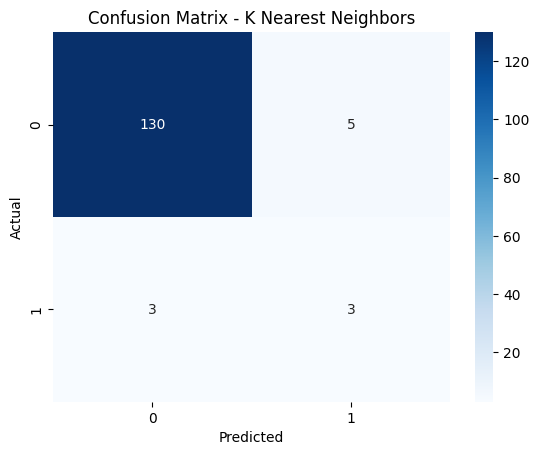

In [23]:
k_values = [1,3,5,7,11]
best_acc = float('-inf')
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote, y_train_smote)
    y_pred = knn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    if (acc>best_acc):
        best_acc = acc
        kValueForKNN = k
print(f'Chosen "k" value: {kValueForKNN}')
knn = KNeighborsClassifier(n_neighbors=kValueForKNN)
# model_evaluate(knn, f"K Nearest Neighbors (k={kValueForKNN})")
model_evaluate(knn, f"K Nearest Neighbors")


#### 2.For Classes balanced using UnderSampling

Chosen "k" value: 5

K Nearest Neighbors Validation Results
Accuracy: 85.8156
Precision: 0.1500
Recall: 0.5000
F1-score: 0.2308
ROC-AUC: 0.8228
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       135
           1       0.15      0.50      0.23         6

    accuracy                           0.86       141
   macro avg       0.56      0.69      0.58       141
weighted avg       0.94      0.86      0.89       141



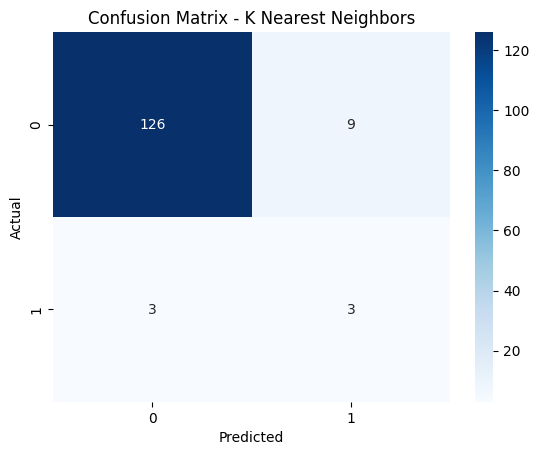

In [24]:
k_values = [1,3,5,7,11]
best_acc = float('-inf')
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_under_train, y_under_train)
    y_under_pred = knn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_under_pred)
    if (acc>best_acc):
        best_acc = acc
        kValueForKNN = k
print(f'Chosen "k" value: {kValueForKNN}')
knn = KNeighborsClassifier(n_neighbors=kValueForKNN)
# model_under_evaluate(knn, f"K Nearest Neighbors (k={kValueForKNN})")
model_under_evaluate(knn, f"K Nearest Neighbors")


#### 3.For Classes balanced using OverSampling

Chosen "k" value: 1

K Nearest Neighbors Validation Results
Accuracy: 85.8156
Precision: 0.1500
Recall: 0.5000
F1-score: 0.2308
ROC-AUC: 0.7463
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       135
           1       0.15      0.50      0.23         6

    accuracy                           0.86       141
   macro avg       0.56      0.69      0.58       141
weighted avg       0.94      0.86      0.89       141



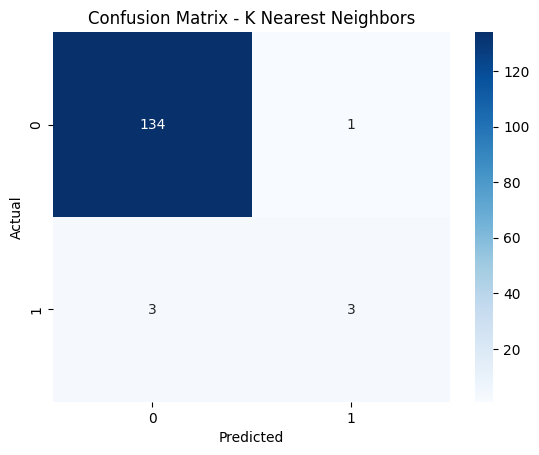

In [25]:
k_values = [1,3,5,7,11]
best_acc = float('-inf')
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_over_train, y_over_train)
    y_over_pred = knn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_over_pred)
    if (acc>best_acc):
        best_acc = acc
        kValueForKNN = k
print(f'Chosen "k" value: {kValueForKNN}')
knn = KNeighborsClassifier(n_neighbors=kValueForKNN)
# model_over_evaluate(knn, f"K Nearest Neighbors (k={kValueForKNN})")
model_over_evaluate(knn, f"K Nearest Neighbors")


### Naive Bayes Classifier

#### 1.For Classes Balanced using SMOTE


Naive Bayes Classifier Validation Results
Accuracy: 30.4965
Precision: 0.0490
Recall: 0.8333
F1-score: 0.0926
ROC-AUC: 0.7728
              precision    recall  f1-score   support

           0       0.97      0.28      0.44       135
           1       0.05      0.83      0.09         6

    accuracy                           0.30       141
   macro avg       0.51      0.56      0.26       141
weighted avg       0.93      0.30      0.42       141



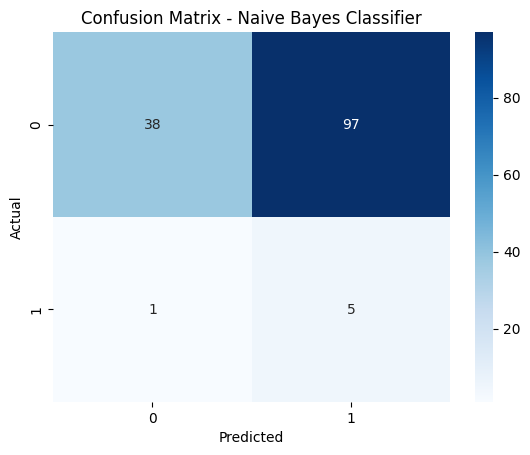

In [26]:
nb = GaussianNB()
model_evaluate(nb, "Naive Bayes Classifier")

#### 2.For Classes Balanced using UnderSampling


Naive Bayes Classifier Validation Results
Accuracy: 85.8156
Precision: 0.1500
Recall: 0.5000
F1-score: 0.2308
ROC-AUC: 0.7043
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       135
           1       0.15      0.50      0.23         6

    accuracy                           0.86       141
   macro avg       0.56      0.69      0.58       141
weighted avg       0.94      0.86      0.89       141



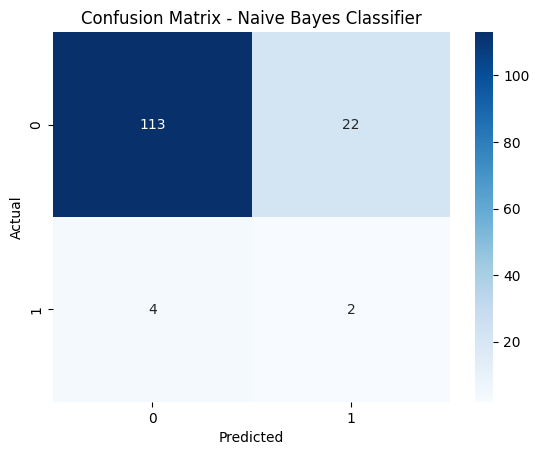

In [27]:
nb_under = GaussianNB()
model_under_evaluate(nb_under, "Naive Bayes Classifier")

#### 3.For Classes Balanced using OverSampling


Naive Bayes Classifier Validation Results
Accuracy: 85.8156
Precision: 0.1500
Recall: 0.5000
F1-score: 0.2308
ROC-AUC: 0.7852
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       135
           1       0.15      0.50      0.23         6

    accuracy                           0.86       141
   macro avg       0.56      0.69      0.58       141
weighted avg       0.94      0.86      0.89       141



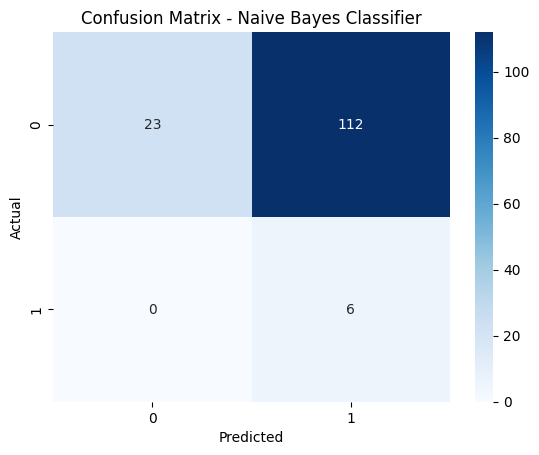

In [28]:
nb_over = GaussianNB()
model_over_evaluate(nb_over, "Naive Bayes Classifier")

#### **SVM (Support Vector Machine)**

##### Linear SVM

#### 1.For Classes balanced using SMOTE

Chosen "C" value: 10

Linear SVM Validation Results
Accuracy: 95.0355
Precision: 0.4545
Recall: 0.8333
F1-score: 0.5882
ROC-AUC: 0.8667
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       135
           1       0.45      0.83      0.59         6

    accuracy                           0.95       141
   macro avg       0.72      0.89      0.78       141
weighted avg       0.97      0.95      0.96       141



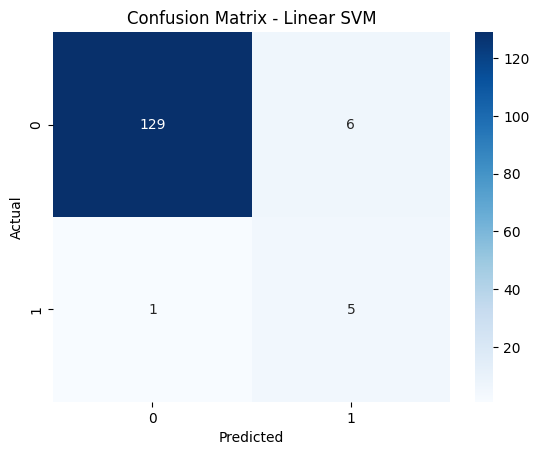

In [29]:
c_values = [0.01, 0.1, 1, 10, 100]
best_acc = float('-inf')
for c in c_values:
    linear_svm = SVC(kernel='linear', C=c)
    linear_svm.fit(X_train_smote, y_train_smote)
    y_pred = linear_svm.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    if (acc>best_acc):
        best_acc=acc
        regularization_const = c
print(f'Chosen "C" value: {regularization_const}')

linear_svm = SVC(kernel='linear', C=regularization_const)
# model_evaluate(linear_svm, f"Linear SVM (c={regularization_const})")
model_evaluate(linear_svm, f"Linear SVM")

#### 2.For Classes balanced using UnderSampling

Chosen "C" value: 0.01

Linear SVM Validation Results
Accuracy: 95.0355
Precision: 0.4444
Recall: 0.6667
F1-score: 0.5333
ROC-AUC: 0.8148
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       135
           1       0.44      0.67      0.53         6

    accuracy                           0.95       141
   macro avg       0.71      0.81      0.75       141
weighted avg       0.96      0.95      0.96       141



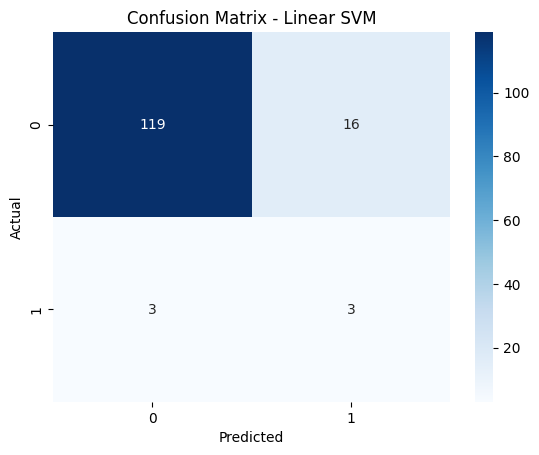

In [30]:
c_values = [0.01, 0.1, 1, 10, 100]
best_acc = float('-inf')
for c in c_values:
    linear_svm_under = SVC(kernel='linear', C=c)
    linear_svm_under.fit(X_under_train, y_under_train)
    y_under_pred = linear_svm_under.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_under_pred)
    if (acc>best_acc):
        best_acc=acc
        regularization_const = c
print(f'Chosen "C" value: {regularization_const}')

linear_svm_under = SVC(kernel='linear', C=regularization_const)
# model_under_evaluate(linear_svm, f"Linear SVM (c={regularization_const})")
model_under_evaluate(linear_svm_under, f"Linear SVM")

#### 3.For Classes balanced using OverSampling

Chosen "C" value: 10

Linear SVM Validation Results
Accuracy: 95.0355
Precision: 0.4444
Recall: 0.6667
F1-score: 0.5333
ROC-AUC: 0.8667
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       135
           1       0.44      0.67      0.53         6

    accuracy                           0.95       141
   macro avg       0.71      0.81      0.75       141
weighted avg       0.96      0.95      0.96       141



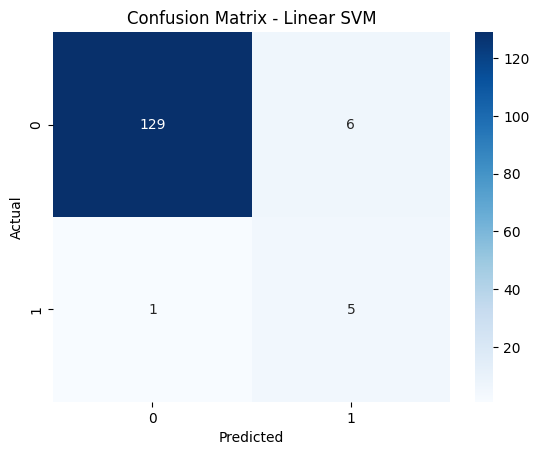

In [31]:
c_values = [0.01, 0.1, 1, 10, 100]
best_acc = float('-inf')
for c in c_values:
    linear_svm_over = SVC(kernel='linear', C=c)
    linear_svm_over.fit(X_over_train, y_over_train)
    y_over_pred = linear_svm_over.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_over_pred)
    if (acc>best_acc):
        best_acc=acc
        regularization_const = c
print(f'Chosen "C" value: {regularization_const}')

linear_svm_over = SVC(kernel='linear', C=regularization_const)
# model_over_evaluate(linear_svm, f"Linear SVM (c={regularization_const})")
model_over_evaluate(linear_svm_over, f"Linear SVM")

### RBF (Radial Basis Function) SVM

#### 1.For data balanced using SMOTE

Chosen "C" value: 10

RBF SVM Validation Results
Accuracy: 94.3262
Precision: 0.3750
Recall: 0.5000
F1-score: 0.4286
ROC-AUC: 0.8753
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       135
           1       0.38      0.50      0.43         6

    accuracy                           0.94       141
   macro avg       0.68      0.73      0.70       141
weighted avg       0.95      0.94      0.95       141



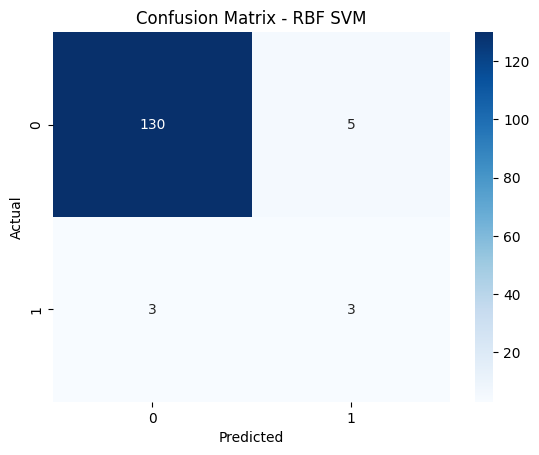

In [32]:
c_values = [0.01, 0.1, 1, 10, 100]
best_acc = float('-inf')
for c in c_values:
    rbf = SVC(kernel='rbf', C=c, gamma='scale')
    rbf.fit(X_train_smote, y_train_smote)
    y_pred = rbf.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    if (acc>best_acc):
        best_acc=acc
        regularization_const = c
print(f'Chosen "C" value: {regularization_const}')

rbf = SVC(kernel='rbf', C=regularization_const, gamma='scale')
# model_evaluate(rbf, f"RBF SVM (c={regularization_const})")
model_evaluate(rbf, f"RBF SVM")

#### 2.For data balanced using UnderSampling

Chosen "C" value: 0.01

RBF SVM Validation Results
Accuracy: 82.9787
Precision: 0.1786
Recall: 0.8333
F1-score: 0.2941
ROC-AUC: 0.7790
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       135
           1       0.18      0.83      0.29         6

    accuracy                           0.83       141
   macro avg       0.58      0.83      0.60       141
weighted avg       0.96      0.83      0.88       141



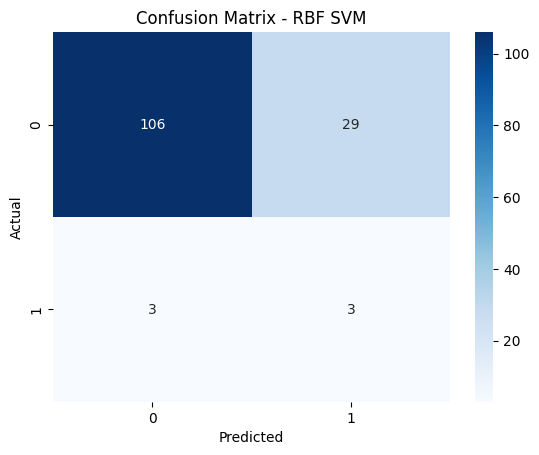

In [33]:
c_values = [0.01, 0.1, 1, 10, 100]
best_acc = float('-inf')
for c in c_values:
    rbf = SVC(kernel='rbf', C=c, gamma='scale')
    rbf.fit(X_under_train, y_under_train)
    y_pred = rbf.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_under_pred)
    if (acc>best_acc):
        best_acc=acc
        regularization_const = c
print(f'Chosen "C" value: {regularization_const}')

rbf= SVC(kernel='rbf', C=regularization_const, gamma='scale')
# model_under_evaluate(rbf, f"RBF SVM (c={regularization_const})")
model_under_evaluate(rbf, f"RBF SVM")

#### 3.For data balanced using OverSampling

Chosen "C" value: 10

RBF SVM Validation Results
Accuracy: 82.9787
Precision: 0.1786
Recall: 0.8333
F1-score: 0.2941
ROC-AUC: 0.8605
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       135
           1       0.18      0.83      0.29         6

    accuracy                           0.83       141
   macro avg       0.58      0.83      0.60       141
weighted avg       0.96      0.83      0.88       141



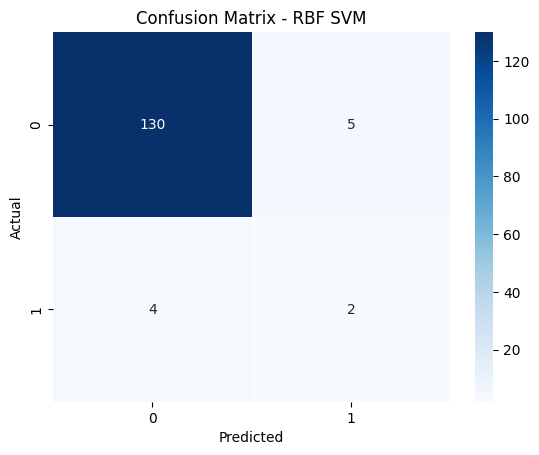

In [34]:
c_values = [0.01, 0.1, 1, 10, 100]
best_acc = float('-inf')
for c in c_values:
    rbf = SVC(kernel='rbf', C=c, gamma='scale')
    rbf.fit(X_over_train, y_over_train)
    y_over_pred = rbf.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_over_pred)
    if (acc>best_acc):
        best_acc=acc
        regularization_const = c
print(f'Chosen "C" value: {regularization_const}')

rbf= SVC(kernel='rbf', C=regularization_const, gamma='scale')
# model_over_evaluate(rbf, f"RBF SVM (c={regularization_const})")
model_over_evaluate(rbf, f"RBF SVM")

### Polynomial SVM

#### 1.For data balanced using SMOTE

Chosen "C" value: 0.01
Chosen Degree: 3

Polynomial SVM Validation Results
Accuracy: 95.7447
Precision: 0.5000
Recall: 0.1667
F1-score: 0.2500
ROC-AUC: 0.7704
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       135
           1       0.50      0.17      0.25         6

    accuracy                           0.96       141
   macro avg       0.73      0.58      0.61       141
weighted avg       0.94      0.96      0.95       141



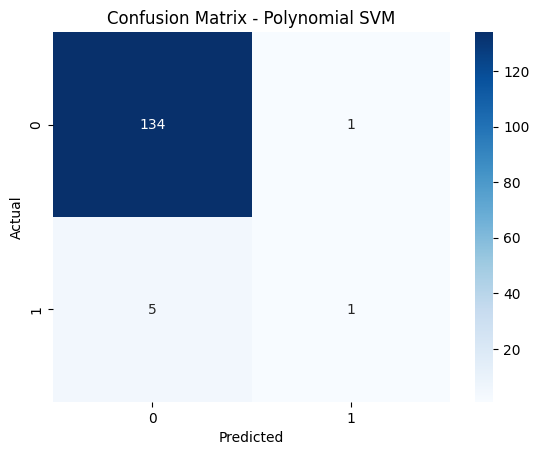

In [35]:
c_values = [0.01, 0.1, 1, 10, 100]
degrees = [2,3,4,5]
best_acc = float('-inf')
for c in c_values:
    for deg in degrees:
        poly_svm = SVC(kernel='poly', degree=deg, C=c, gamma='scale')
        poly_svm.fit(X_train_smote, y_train_smote)
        y_pred = poly_svm.predict(X_val_scaled)
        acc = accuracy_score(y_val, y_pred)
        if (acc>best_acc):
            best_acc=acc
            regularization_const = c
            degForPoly = deg
print(f'Chosen "C" value: {regularization_const}\nChosen Degree: {degForPoly}')

poly_svm = SVC(kernel='poly', degree=degForPoly, C=regularization_const, gamma='scale')
# model_evaluate(poly_svm, f"Polynomial SVM (c={regularization_const}, deg={degForPoly})")
model_evaluate(poly_svm, f"Polynomial SVM")

#### 2.For data balanced using UnderSampling

Chosen "C" value: 0.01
Chosen Degree: 2

Polynomial SVM Validation Results
Accuracy: 85.1064
Precision: 0.1053
Recall: 0.3333
F1-score: 0.1600
ROC-AUC: 0.6049
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       135
           1       0.11      0.33      0.16         6

    accuracy                           0.85       141
   macro avg       0.54      0.60      0.54       141
weighted avg       0.93      0.85      0.89       141



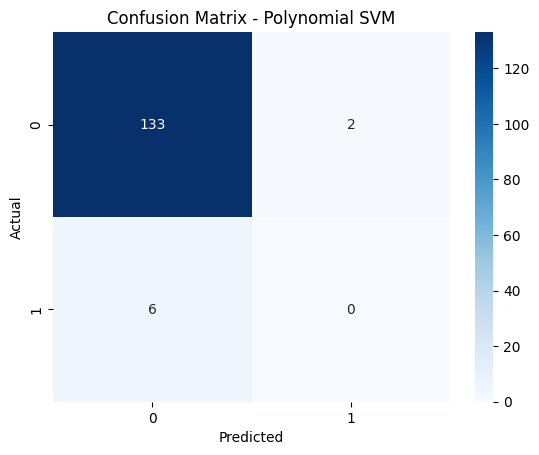

In [36]:
c_values = [0.01, 0.1, 1, 10, 100]
degrees = [2,3,4,5]
best_acc = float('-inf')
for c in c_values:
    for deg in degrees:
        poly_svm = SVC(kernel='poly', degree=deg, C=c, gamma='scale')
        poly_svm.fit(X_under_train, y_under_train)
        y_pred = poly_svm.predict(X_val_scaled)
        acc = accuracy_score(y_val, y_under_pred)
        if (acc>best_acc):
            best_acc=acc
            regularization_const = c
            degForPoly = deg
print(f'Chosen "C" value: {regularization_const}\nChosen Degree: {degForPoly}')

poly_svm = SVC(kernel='poly', degree=degForPoly, C=regularization_const, gamma='scale')
# model_under_evaluate(poly_svm, f"Polynomial SVM (c={regularization_const}, deg={degForPoly})")
model_under_evaluate(poly_svm, f"Polynomial SVM")

#### 3.For data balanced using OverSampling

Chosen "C" value: 0.01
Chosen Degree: 2

Polynomial SVM Validation Results
Accuracy: 91.4894
Precision: 0.2000
Recall: 0.3333
F1-score: 0.2500
ROC-AUC: 0.7025
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       135
           1       0.20      0.33      0.25         6

    accuracy                           0.91       141
   macro avg       0.58      0.64      0.60       141
weighted avg       0.94      0.91      0.92       141



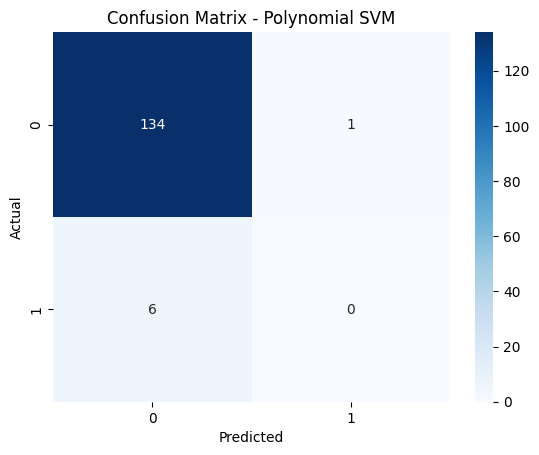

In [37]:
c_values = [0.01, 0.1, 1, 10, 100]
degrees = [2,3,4,5]
best_acc = float('-inf')
for c in c_values:
    for deg in degrees:
        poly_svm = SVC(kernel='poly', degree=deg, C=c, gamma='scale')
        poly_svm.fit(X_over_train, y_over_train)
        y_pred = poly_svm.predict(X_val_scaled)
        acc = accuracy_score(y_val, y_over_pred)
        if (acc>best_acc):
            best_acc=acc
            regularization_const = c
            degForPoly = deg
print(f'Chosen "C" value: {regularization_const}\nChosen Degree: {degForPoly}')

poly_svm = SVC(kernel='poly', degree=degForPoly, C=regularization_const, gamma='scale')
# model_over_evaluate(poly_svm, f"Polynomial SVM (c={regularization_const}, deg={degForPoly})")
model_over_evaluate(poly_svm, f"Polynomial SVM")

**RANDOM FOREST**

#### 1.For data balanced using SMOTE


Random Forest Validation Results
Accuracy: 94.3262
Precision: 0.3333
Recall: 0.3333
F1-score: 0.3333
ROC-AUC: 0.8938
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       135
           1       0.33      0.33      0.33         6

    accuracy                           0.94       141
   macro avg       0.65      0.65      0.65       141
weighted avg       0.94      0.94      0.94       141



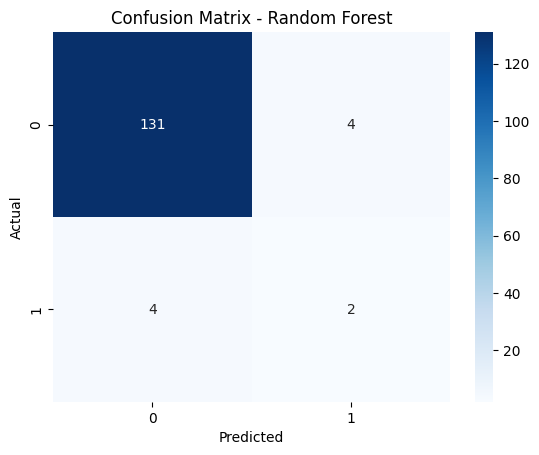

In [38]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_evaluate(rf, "Random Forest")

#### 2.For data balanced using UnderSampling


Random Forest Validation Results
Accuracy: 91.4894
Precision: 0.2000
Recall: 0.3333
F1-score: 0.2500
ROC-AUC: 0.7488
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       135
           1       0.20      0.33      0.25         6

    accuracy                           0.91       141
   macro avg       0.58      0.64      0.60       141
weighted avg       0.94      0.91      0.92       141



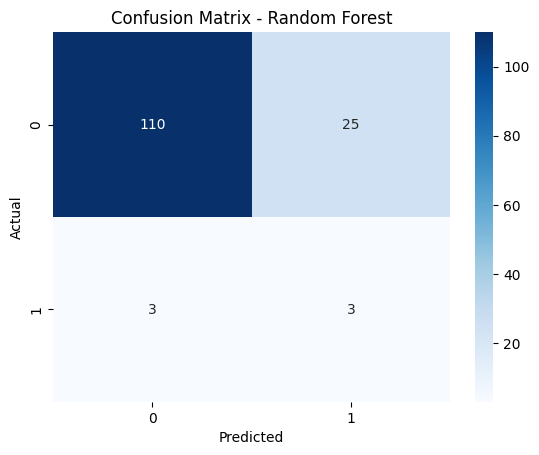

In [39]:
rf_under = RandomForestClassifier(n_estimators=100, random_state=42)
model_under_evaluate(rf_under, "Random Forest")

#### 3.For data balanced using OverSampling


Random Forest Validation Results
Accuracy: 91.4894
Precision: 0.2000
Recall: 0.3333
F1-score: 0.2500
ROC-AUC: 0.8519
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       135
           1       0.20      0.33      0.25         6

    accuracy                           0.91       141
   macro avg       0.58      0.64      0.60       141
weighted avg       0.94      0.91      0.92       141



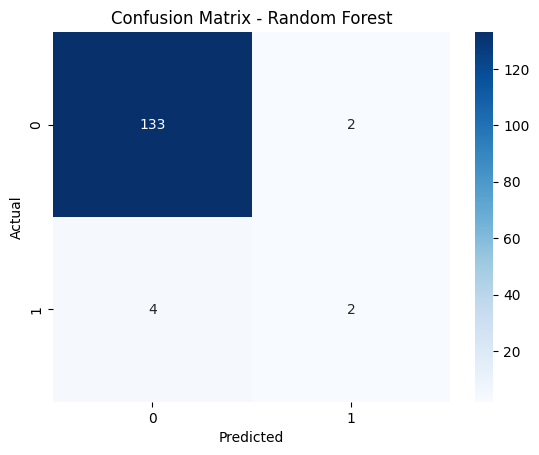

In [40]:
rf_over = RandomForestClassifier(n_estimators=100, random_state=42)
model_over_evaluate(rf_over, "Random Forest")

**LOGISTIC REGRESSION**

#### 1.For data balanced using SMOTE


Logistic Regression Validation Results
Accuracy: 91.4894
Precision: 0.3125
Recall: 0.8333
F1-score: 0.4545
ROC-AUC: 0.8741
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       135
           1       0.31      0.83      0.45         6

    accuracy                           0.91       141
   macro avg       0.65      0.88      0.70       141
weighted avg       0.96      0.91      0.93       141



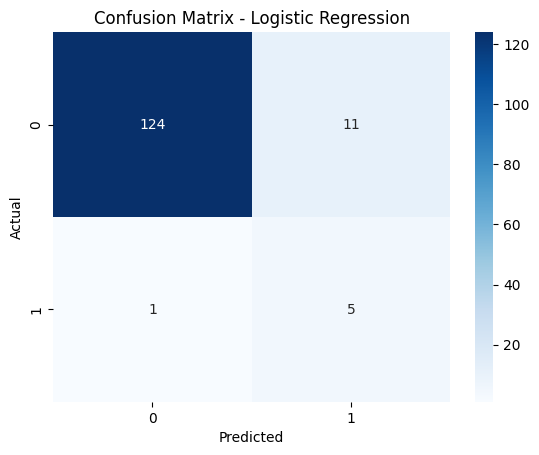

In [41]:
lr = LogisticRegression()
model_evaluate(lr, "Logistic Regression")

 Sensitivity Analysis

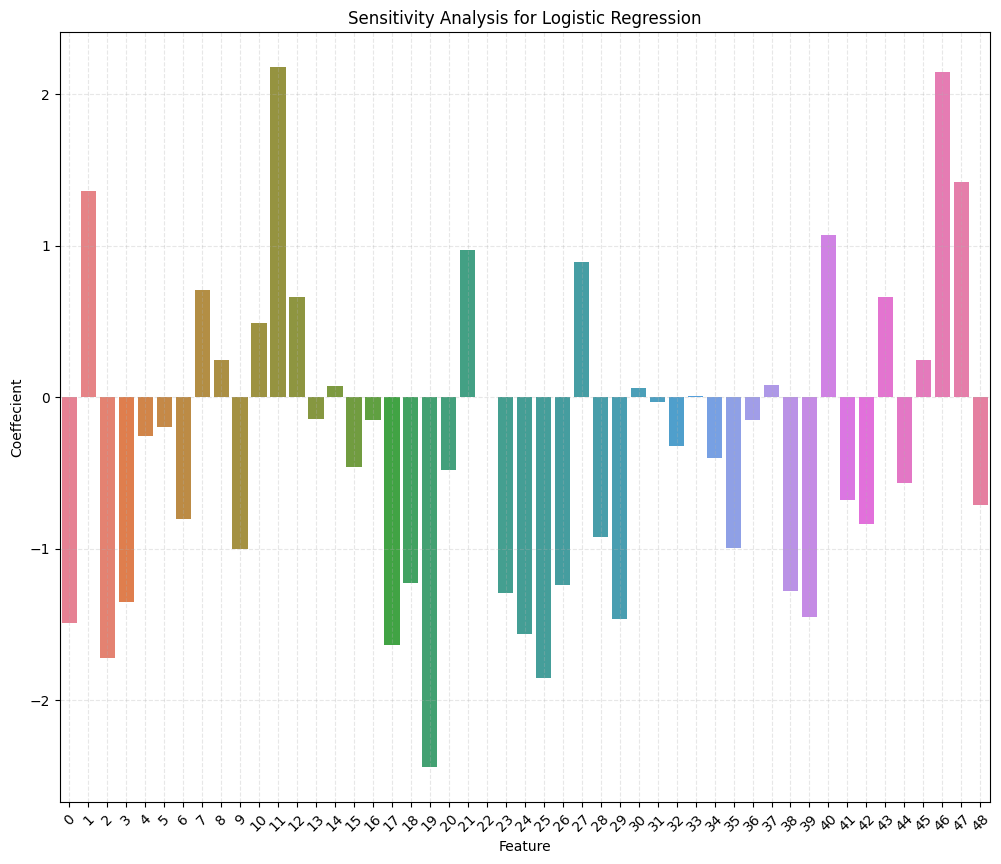

In [42]:
plt.figure(figsize=(12,10))
sns.barplot(lr.coef_)
plt.title("Sensitivity Analysis for Logistic Regression")
plt.xlabel("Feature")
plt.ylabel("Coeffecient")
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.3)

#### 2.For data balanced using UnderSampling


Logistic Regression Validation Results
Accuracy: 91.4894
Precision: 0.2000
Recall: 0.3333
F1-score: 0.2500
ROC-AUC: 0.8185
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       135
           1       0.20      0.33      0.25         6

    accuracy                           0.91       141
   macro avg       0.58      0.64      0.60       141
weighted avg       0.94      0.91      0.92       141



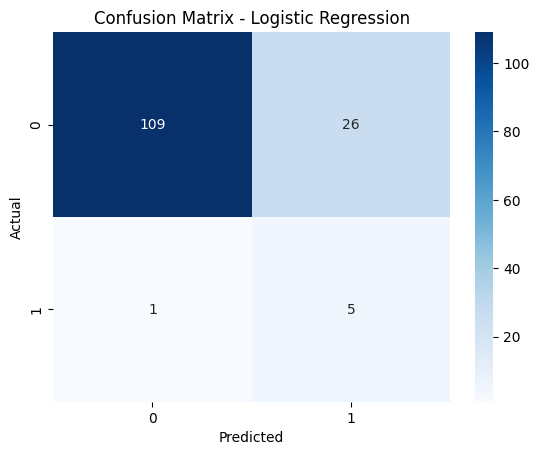

In [43]:
lr_under = LogisticRegression()
model_under_evaluate(lr_under, "Logistic Regression")

Sensitivity Analysis

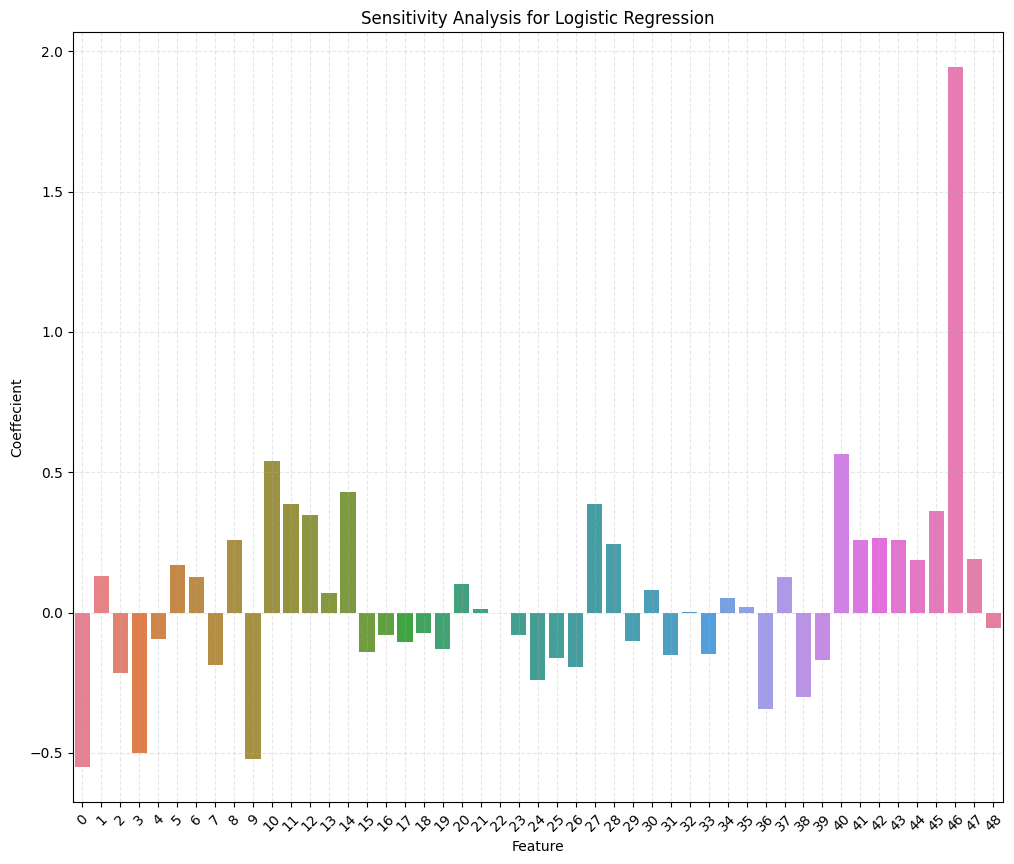

In [44]:
plt.figure(figsize=(12,10))
sns.barplot(lr_under.coef_)
plt.title("Sensitivity Analysis for Logistic Regression")
plt.xlabel("Feature")
plt.ylabel("Coeffecient")
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.3)

#### 3.For data balanced using OverSampling


Logistic Regression Validation Results
Accuracy: 91.4894
Precision: 0.2000
Recall: 0.3333
F1-score: 0.2500
ROC-AUC: 0.8802
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       135
           1       0.20      0.33      0.25         6

    accuracy                           0.91       141
   macro avg       0.58      0.64      0.60       141
weighted avg       0.94      0.91      0.92       141



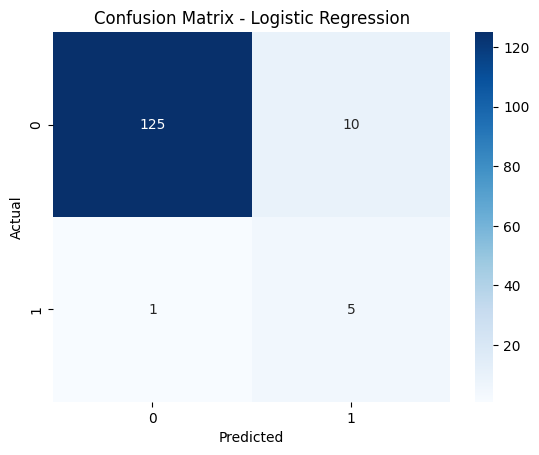

In [45]:
lr_over = LogisticRegression()
model_over_evaluate(lr_over, "Logistic Regression")

Sensitivity Analysis

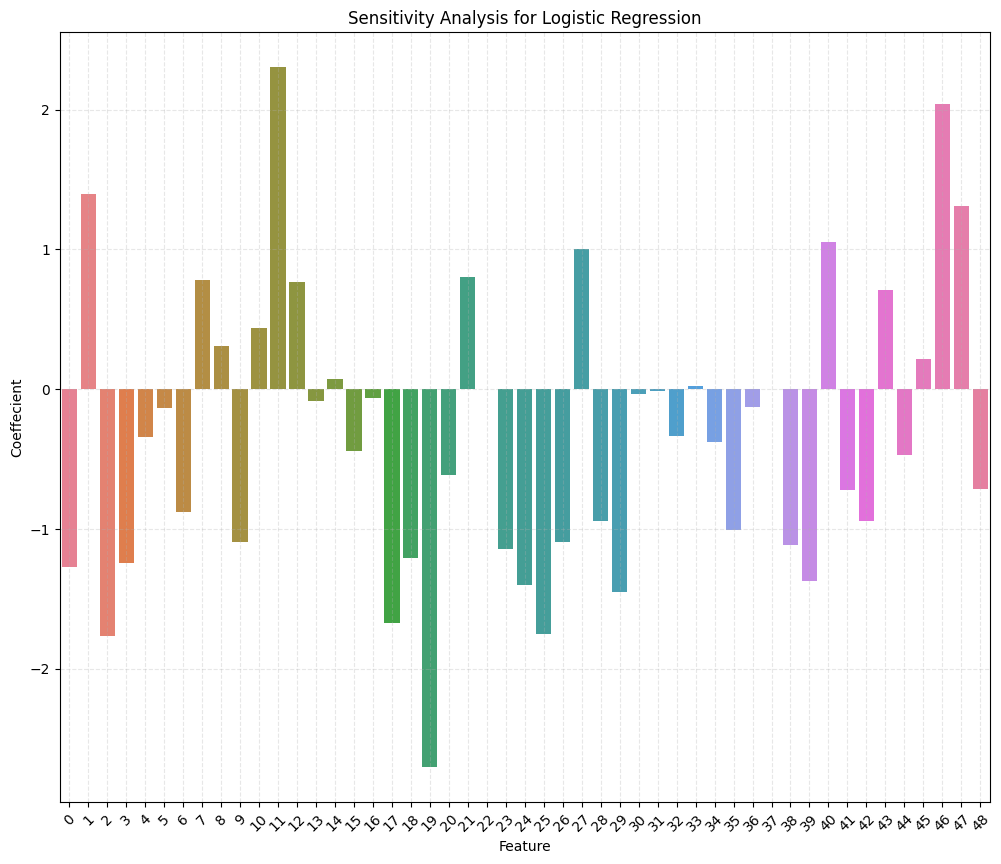

In [46]:
plt.figure(figsize=(12,10))
sns.barplot(lr_over.coef_)
plt.title("Sensitivity Analysis for Logistic Regression")
plt.xlabel("Feature")
plt.ylabel("Coeffecient")
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.3)

### Perceptron Model

#### 1.For data balanced using SMOTE


Perceptron Model Validation Results
Accuracy: 95.7447
Precision: 0.5000
Recall: 0.8333
F1-score: 0.6250
ROC-AUC: 0.9012
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       135
           1       0.50      0.83      0.62         6

    accuracy                           0.96       141
   macro avg       0.75      0.90      0.80       141
weighted avg       0.97      0.96      0.96       141



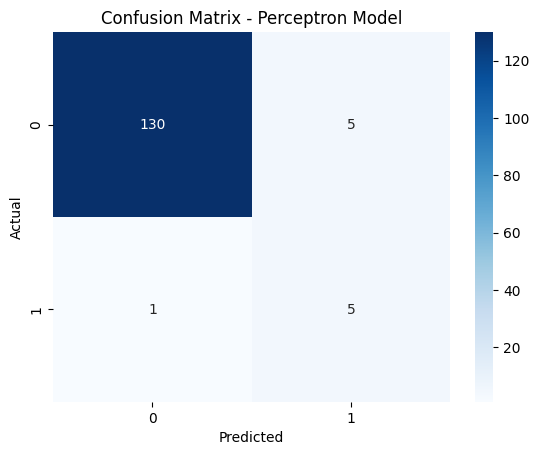

In [47]:
perceptron = Perceptron(tol=1e-3)
model_evaluate(perceptron, "Perceptron Model")

#### 2.For data balanced using UnderSampling


Perceptron Model Validation Results
Accuracy: 91.4894
Precision: 0.2000
Recall: 0.3333
F1-score: 0.2500
ROC-AUC: 0.8617
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       135
           1       0.20      0.33      0.25         6

    accuracy                           0.91       141
   macro avg       0.58      0.64      0.60       141
weighted avg       0.94      0.91      0.92       141



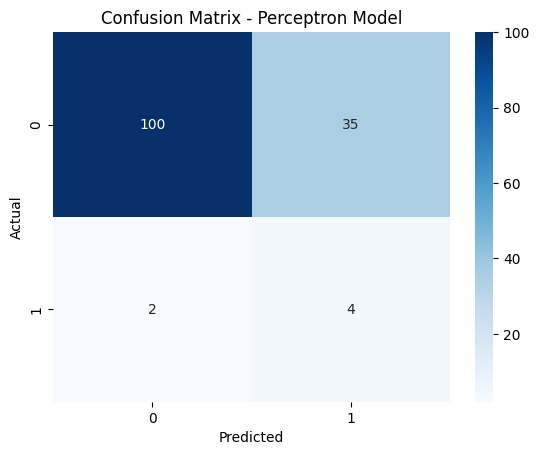

In [48]:
perceptron_under = Perceptron(tol=1e-3)
model_under_evaluate(perceptron_under, "Perceptron Model")

#### 3.For data balanced using OverSampling


Perceptron Model Validation Results
Accuracy: 91.4894
Precision: 0.2000
Recall: 0.3333
F1-score: 0.2500
ROC-AUC: 0.9272
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       135
           1       0.20      0.33      0.25         6

    accuracy                           0.91       141
   macro avg       0.58      0.64      0.60       141
weighted avg       0.94      0.91      0.92       141



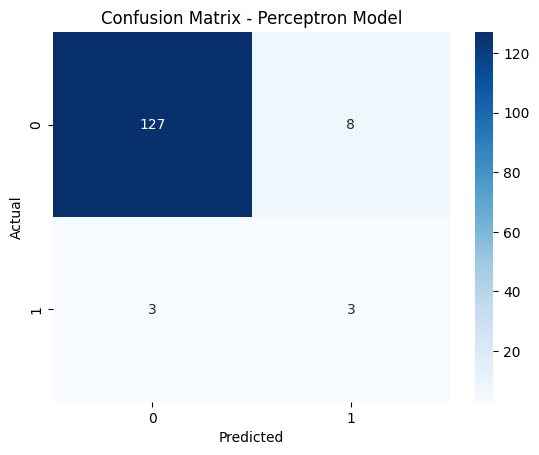

In [49]:
perceptron_over = Perceptron(tol=1e-3)
model_over_evaluate(perceptron_over, "Perceptron Model")

## Neural network -{Sigmoid}

#### 1.For data balanced using SMOTE

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



✅ Chosen Best Hidden Layer Configuration: (100, 100)

Neural Network Validation Results
Accuracy: 90.7801
Precision: 0.1818
Recall: 0.3333
F1-score: 0.2353
ROC-AUC: 0.8617
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       135
           1       0.18      0.33      0.24         6

    accuracy                           0.91       141
   macro avg       0.58      0.63      0.59       141
weighted avg       0.94      0.91      0.92       141



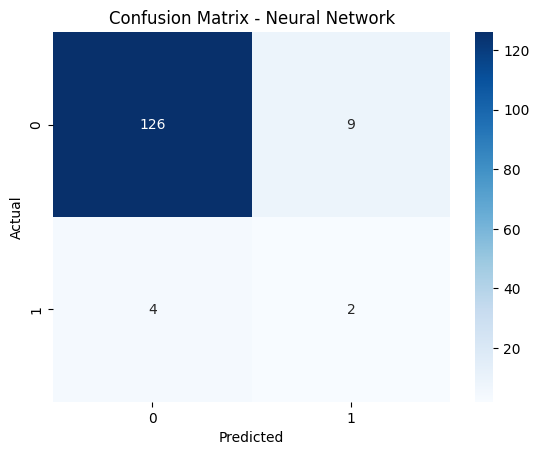

In [50]:
hidden_layer_configs = [(50,), (100,), (50, 50), (100, 50), (100, 100)]
best_acc = float('-inf')

for layers in hidden_layer_configs:
    nn = MLPClassifier(hidden_layer_sizes=layers,activation='logistic', max_iter=500, random_state=42)
    nn.fit(X_train_smote, y_train_smote)
    y_pred = nn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    # model_evaluate(nn, f"Neural Net {layers}")
    if acc > best_acc:
        best_acc = acc
        best_hidden_layer_config = layers

print(f'\n✅ Chosen Best Hidden Layer Configuration: {best_hidden_layer_config}')
nn = MLPClassifier(hidden_layer_sizes=best_hidden_layer_config, max_iter=500, random_state=42)
model_evaluate(nn, "Neural Network")

#### 2.For data balanced using UnderSampling

Chosen Hidden Layer Configuration: (50, 50)

Neural Network Validation Results
Accuracy: 78.0142
Precision: 0.1212
Recall: 0.6667
F1-score: 0.2051
ROC-AUC: 0.7617
              precision    recall  f1-score   support

           0       0.98      0.79      0.87       135
           1       0.12      0.67      0.21         6

    accuracy                           0.78       141
   macro avg       0.55      0.73      0.54       141
weighted avg       0.94      0.78      0.84       141



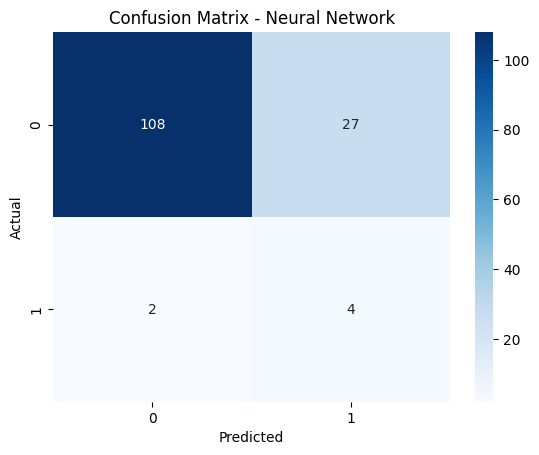

In [51]:
hidden_layer_configs = [(50,), (100,), (50, 50), (100, 50), (100, 100)]
best_acc = float('-inf')
for layers in hidden_layer_configs:
    nn = MLPClassifier(hidden_layer_sizes=layers, max_iter=500, random_state=42)
    nn.fit(X_under_train, y_under_train)
    y_pred = nn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    if (acc>best_acc):
        best_acc = acc
        best_hidden_layer_config = layers
print(f'Chosen Hidden Layer Configuration: {best_hidden_layer_config}')
nn = MLPClassifier(hidden_layer_sizes=best_hidden_layer_config, max_iter=500, random_state=42)
model_under_evaluate(nn, "Neural Network")

#### 3.For data balanced using OverSampling

Chosen Hidden Layer Configuration: (50, 50)

Neural Network Validation Results
Accuracy: 91.4894
Precision: 0.2000
Recall: 0.3333
F1-score: 0.2500
ROC-AUC: 0.7975
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       135
           1       0.20      0.33      0.25         6

    accuracy                           0.91       141
   macro avg       0.58      0.64      0.60       141
weighted avg       0.94      0.91      0.92       141



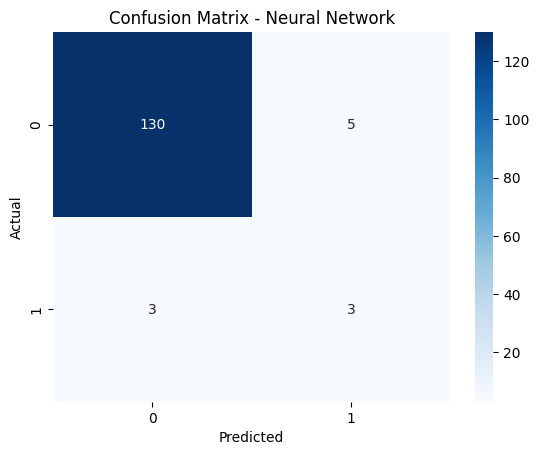

In [52]:
hidden_layer_configs = [(50,), (100,), (50, 50), (100, 50), (100, 100)]
best_acc = float('-inf')
for layers in hidden_layer_configs:
    nn = MLPClassifier(hidden_layer_sizes=layers, max_iter=500, random_state=42)
    nn.fit(X_over_train, y_over_train)
    y_pred = nn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    if (acc>best_acc):
        best_acc = acc
        best_hidden_layer_config = layers
print(f'Chosen Hidden Layer Configuration: {best_hidden_layer_config}')
nn = MLPClassifier(hidden_layer_sizes=best_hidden_layer_config, max_iter=500, random_state=42)
model_over_evaluate(nn, f"Neural Network")

### Implementing Neural Network using 'Tanh' Activation Function  

#### 1.For data balanced using SMOTE

Chosen Hidden Layer Configuration: (100, 100)

Neural Network (Tanh) Validation Results
Accuracy: 92.9078
Precision: 0.3000
Recall: 0.5000
F1-score: 0.3750
ROC-AUC: 0.8395
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       135
           1       0.30      0.50      0.38         6

    accuracy                           0.93       141
   macro avg       0.64      0.72      0.67       141
weighted avg       0.95      0.93      0.94       141



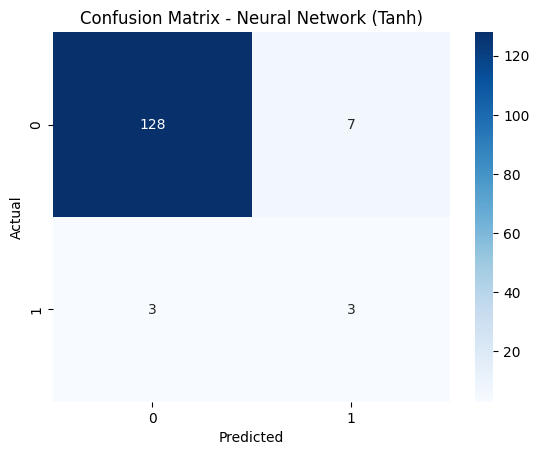

In [53]:
hidden_layer_configs = [(50,), (100,), (50, 50), (100, 50), (100, 100)]
best_acc = float('-inf')
for layers in hidden_layer_configs:
    nn = MLPClassifier(hidden_layer_sizes=layers, activation='tanh', max_iter=500, random_state=42)
    nn.fit(X_train_smote, y_train_smote)
    y_pred = nn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    if (acc>best_acc):
        best_acc = acc
        best_hidden_layer_config = layers
print(f'Chosen Hidden Layer Configuration: {best_hidden_layer_config}')
nn = MLPClassifier(hidden_layer_sizes=best_hidden_layer_config, activation='tanh', max_iter=500, random_state=42)
model_evaluate(nn, f"Neural Network (Tanh)")

#### 2.For data balanced using UnderSampling

Chosen Hidden Layer Configuration: (100,)

Neural Network (Tanh) Validation Results
Accuracy: 74.4681
Precision: 0.1053
Recall: 0.6667
F1-score: 0.1818
ROC-AUC: 0.7593
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       135
           1       0.11      0.67      0.18         6

    accuracy                           0.74       141
   macro avg       0.54      0.71      0.52       141
weighted avg       0.94      0.74      0.82       141



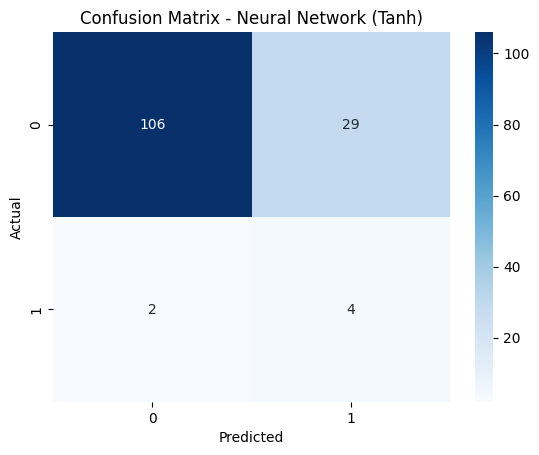

In [54]:
hidden_layer_configs = [(50,), (100,), (50, 50), (100, 50), (100, 100)]
best_acc = float('-inf')
for layers in hidden_layer_configs:
    nn = MLPClassifier(hidden_layer_sizes=layers, activation='tanh', max_iter=500, random_state=42)
    nn.fit(X_under_train, y_under_train)
    y_pred = nn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    if (acc>best_acc):
        best_acc = acc
        best_hidden_layer_config = layers
print(f'Chosen Hidden Layer Configuration: {best_hidden_layer_config}')
nn = MLPClassifier(hidden_layer_sizes=best_hidden_layer_config, activation='tanh', max_iter=500, random_state=42)
model_under_evaluate(nn, f"Neural Network (Tanh)")

#### 3.For data balanced using OverSampling

Chosen Hidden Layer Configuration: (50, 50)

Neural Network (Tanh) Validation Results
Accuracy: 92.1986
Precision: 0.2727
Recall: 0.5000
F1-score: 0.3529
ROC-AUC: 0.8802
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       135
           1       0.27      0.50      0.35         6

    accuracy                           0.92       141
   macro avg       0.62      0.72      0.66       141
weighted avg       0.95      0.92      0.93       141



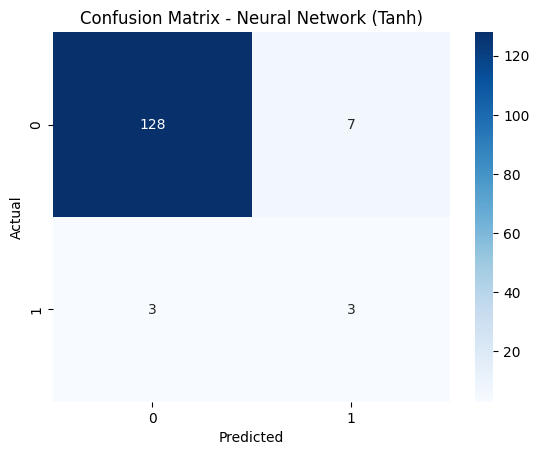

In [55]:
hidden_layer_configs = [(50,), (100,), (50, 50), (100, 50), (100, 100)]
best_acc = float('-inf')
for layers in hidden_layer_configs:
    nn = MLPClassifier(hidden_layer_sizes=layers, activation='tanh', max_iter=500, random_state=42)
    nn.fit(X_over_train, y_over_train)
    y_pred = nn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    if (acc>best_acc):
        best_acc = acc
        best_hidden_layer_config = layers
print(f'Chosen Hidden Layer Configuration: {best_hidden_layer_config}')
nn = MLPClassifier(hidden_layer_sizes=best_hidden_layer_config, activation='tanh', max_iter=500, random_state=42)
model_over_evaluate(nn, f"Neural Network (Tanh)")

### Implementing Neural Network Model using ReLu Activation Function

#### 1.For data balanced using SMOTE

Chosen Hidden Layer Configuration: (50, 50)

Neural Network (ReLu) Validation Results
Accuracy: 94.3262
Precision: 0.3750
Recall: 0.5000
F1-score: 0.4286
ROC-AUC: 0.8333
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       135
           1       0.38      0.50      0.43         6

    accuracy                           0.94       141
   macro avg       0.68      0.73      0.70       141
weighted avg       0.95      0.94      0.95       141



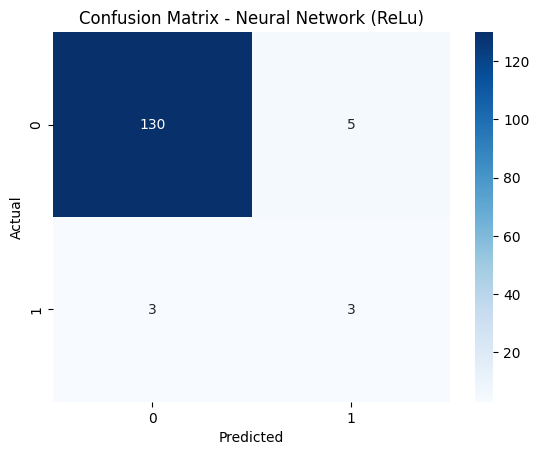

In [56]:
hidden_layer_configs = [(50,), (100,), (50, 50), (100, 50), (100, 100)]
best_acc = float('-inf')
for layers in hidden_layer_configs:
    nn = MLPClassifier(hidden_layer_sizes=layers, activation='relu', max_iter=500, random_state=42)
    nn.fit(X_train_smote, y_train_smote)
    y_pred = nn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    if (acc>best_acc):
        best_acc = acc
        best_hidden_layer_config = layers
print(f'Chosen Hidden Layer Configuration: {best_hidden_layer_config}')
nn = MLPClassifier(hidden_layer_sizes=best_hidden_layer_config, activation='relu', max_iter=500, random_state=42)
model_evaluate(nn, f"Neural Network (ReLu)")

#### 2.For data balanced using UnderSampling

Chosen Hidden Layer Configuration: (50, 50)

Neural Network (ReLu) Validation Results
Accuracy: 78.0142
Precision: 0.1212
Recall: 0.6667
F1-score: 0.2051
ROC-AUC: 0.7617
              precision    recall  f1-score   support

           0       0.98      0.79      0.87       135
           1       0.12      0.67      0.21         6

    accuracy                           0.78       141
   macro avg       0.55      0.73      0.54       141
weighted avg       0.94      0.78      0.84       141



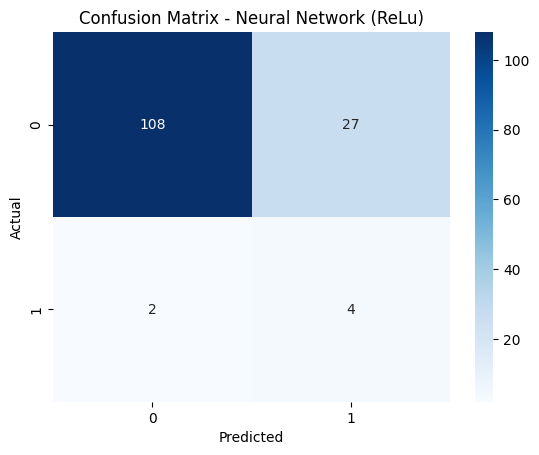

In [57]:
hidden_layer_configs = [(50,), (100,), (50, 50), (100, 50), (100, 100)]
best_acc = float('-inf')
for layers in hidden_layer_configs:
    nn = MLPClassifier(hidden_layer_sizes=layers, activation='relu', max_iter=500, random_state=42)
    nn.fit(X_under_train, y_under_train)
    y_pred = nn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    if (acc>best_acc):
        best_acc = acc
        best_hidden_layer_config = layers
print(f'Chosen Hidden Layer Configuration: {best_hidden_layer_config}')
nn = MLPClassifier(hidden_layer_sizes=best_hidden_layer_config, activation='relu', max_iter=500, random_state=42)
model_under_evaluate(nn, f"Neural Network (ReLu)")

#### 3.For data balanced using OverSampling

Chosen Hidden Layer Configuration: (50, 50)

Neural Network Validation Results
Accuracy: 91.4894
Precision: 0.2000
Recall: 0.3333
F1-score: 0.2500
ROC-AUC: 0.7975
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       135
           1       0.20      0.33      0.25         6

    accuracy                           0.91       141
   macro avg       0.58      0.64      0.60       141
weighted avg       0.94      0.91      0.92       141



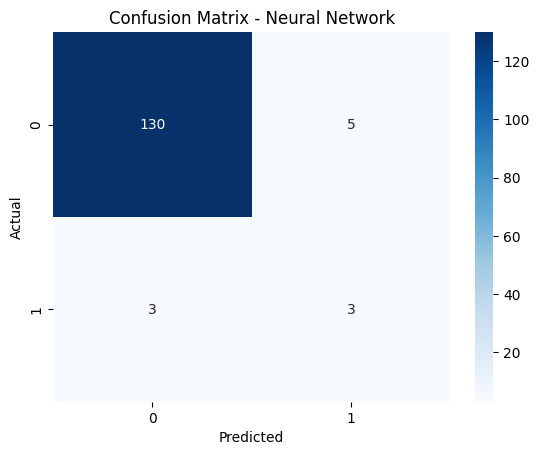

In [58]:
hidden_layer_configs = [(50,), (100,), (50, 50), (100, 50), (100, 100)]
best_acc = float('-inf')
for layers in hidden_layer_configs:
    nn = MLPClassifier(hidden_layer_sizes=layers, activation='relu', max_iter=500, random_state=42)
    nn.fit(X_over_train, y_over_train)
    y_pred = nn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    if (acc>best_acc):
        best_acc = acc
        best_hidden_layer_config = layers
print(f'Chosen Hidden Layer Configuration: {best_hidden_layer_config}')
nn = MLPClassifier(hidden_layer_sizes=best_hidden_layer_config, activation='relu', max_iter=500, random_state=42)
model_over_evaluate(nn, f"Neural Network")

## Important features for Random Forest Classifier

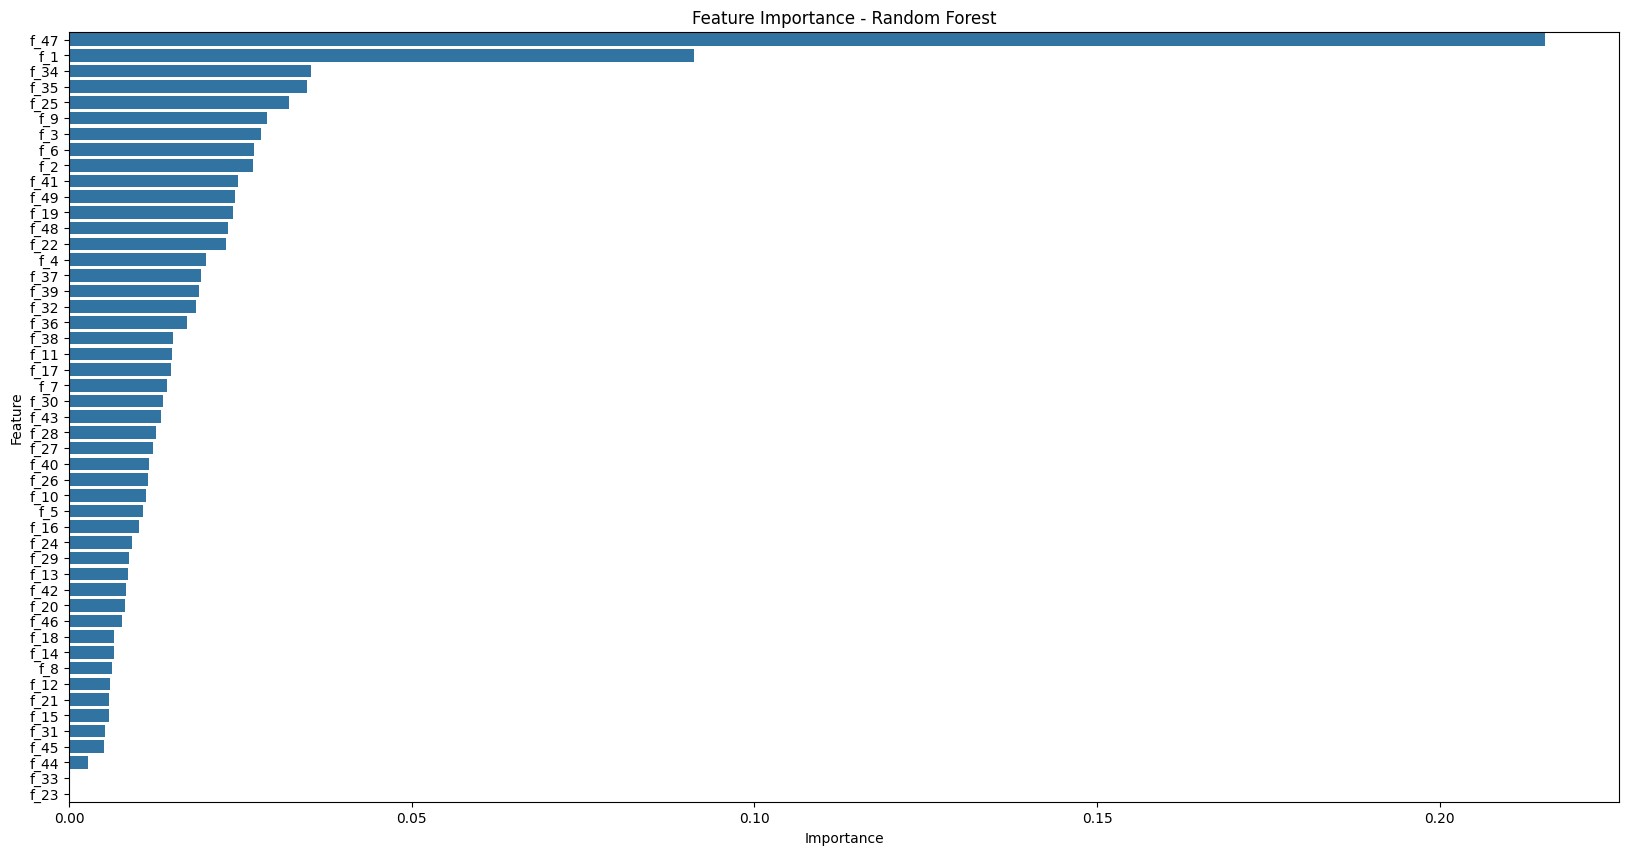

In [59]:
feature_importances = rf.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance - Random Forest')
plt.show()

## Models Comparison

Text(0, 0.5, 'Accuracy')

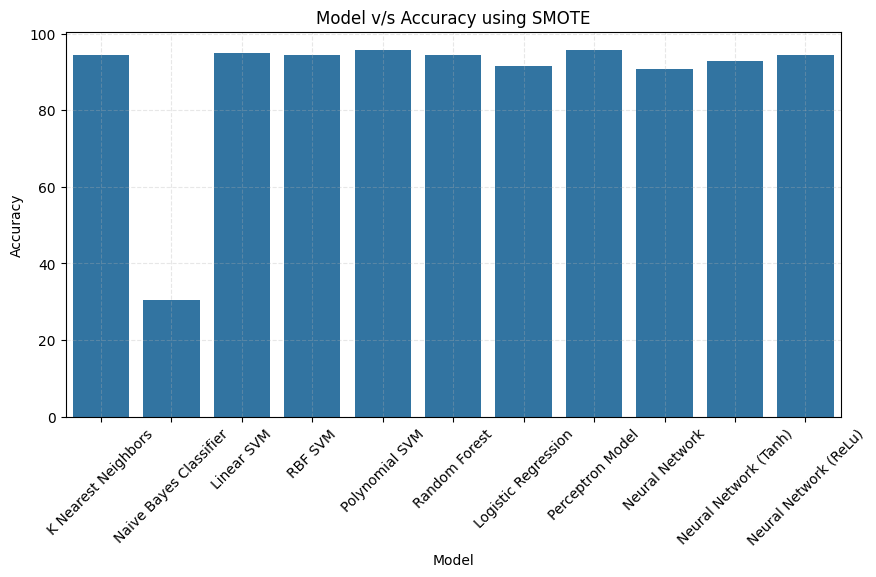

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=accuracy_smote)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.3)
plt.title("Model v/s Accuracy using SMOTE")
plt.xlabel("Model")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

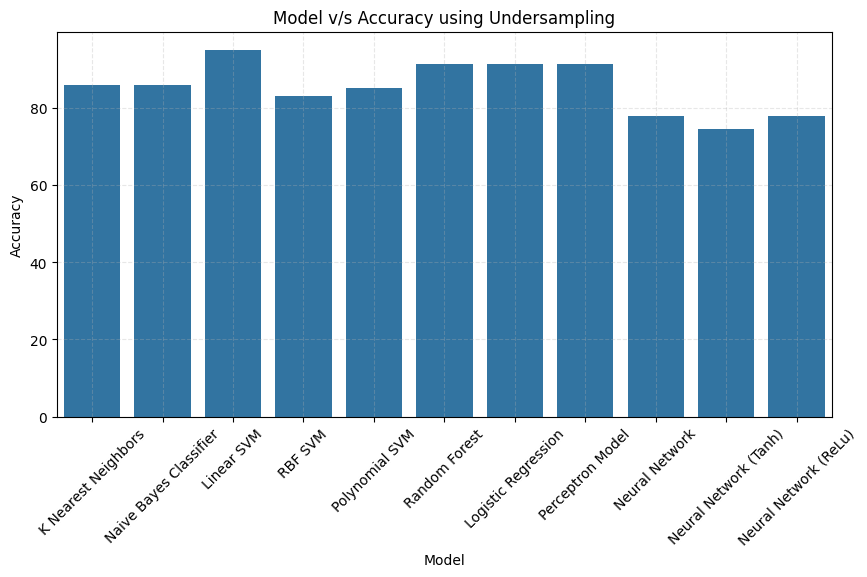

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=accuracy_undersampling)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.3)
plt.title("Model v/s Accuracy using Undersampling")
plt.xlabel("Model")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

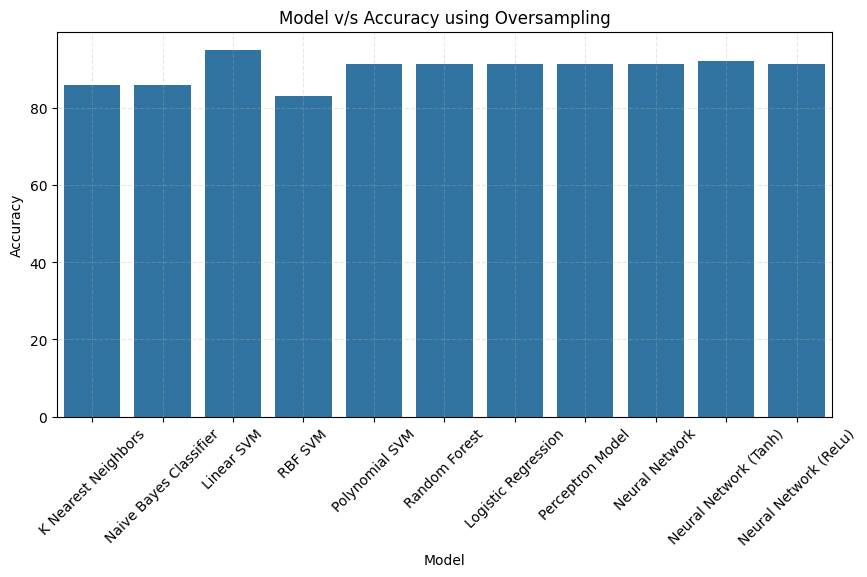

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=accuracy_oversampling)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.3)
plt.title("Model v/s Accuracy using Oversampling")
plt.xlabel("Model")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Precision')

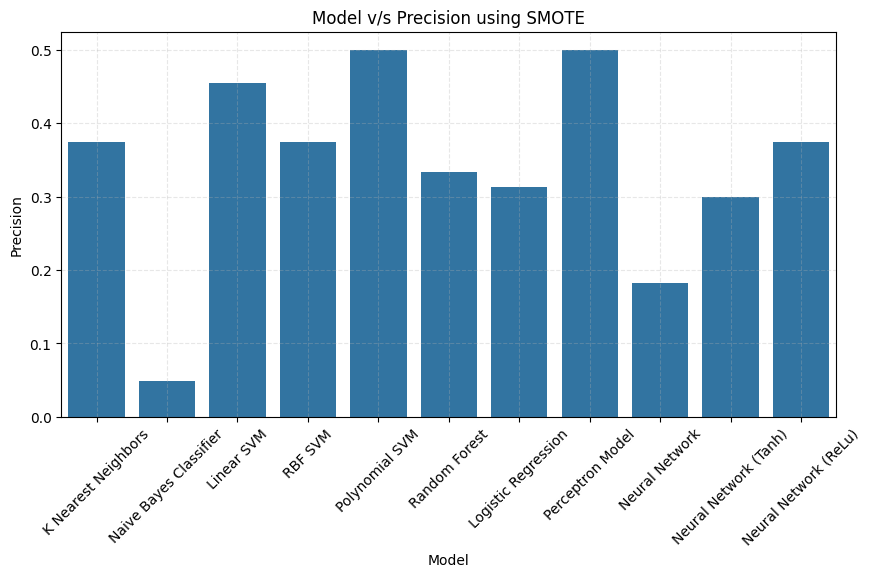

In [63]:
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=precision_smote)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.3)
plt.title("Model v/s Precision using SMOTE")
plt.xlabel("Model")
plt.ylabel("Precision")

Text(0, 0.5, 'Precision')

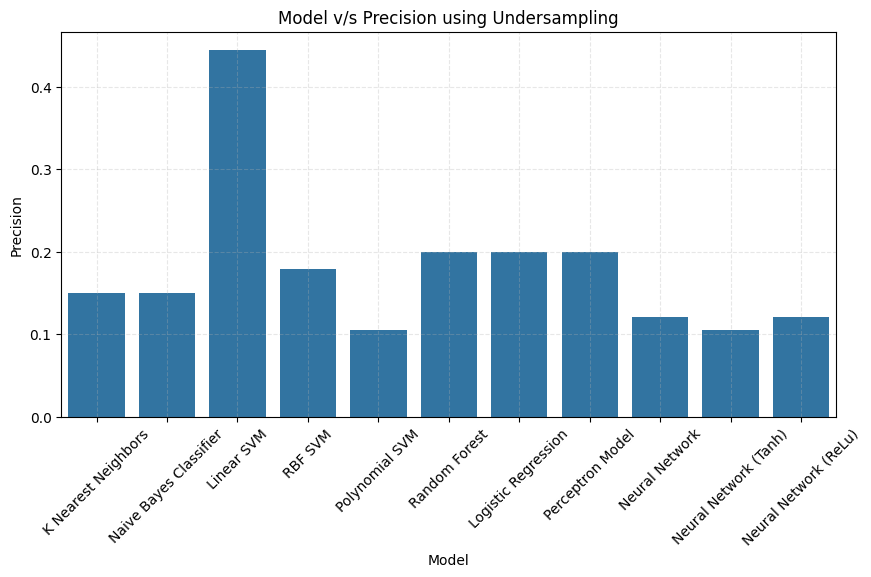

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=precision_undersampling)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.3)
plt.title("Model v/s Precision using Undersampling")
plt.xlabel("Model")
plt.ylabel("Precision")

Text(0, 0.5, 'Precision')

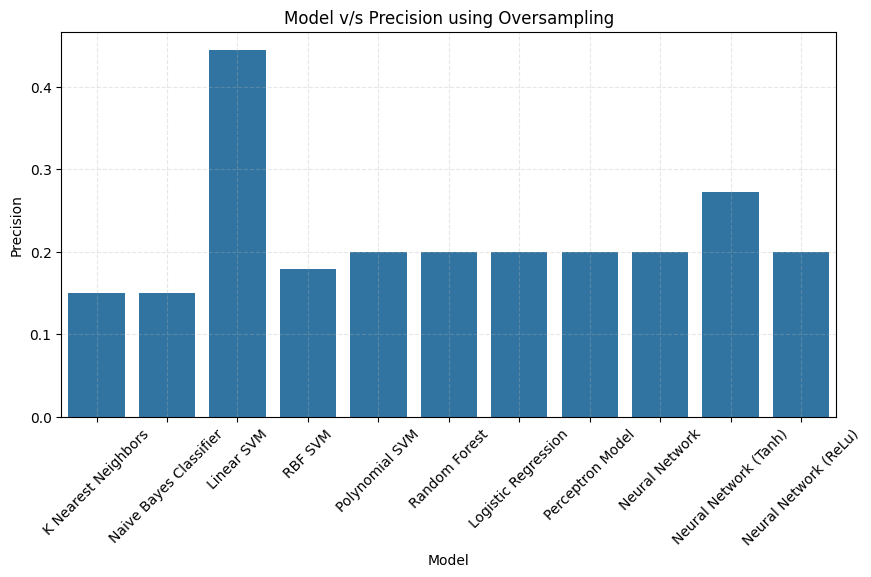

In [65]:
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=precision_oversampling)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.3)
plt.title("Model v/s Precision using Oversampling")
plt.xlabel("Model")
plt.ylabel("Precision")

Text(0, 0.5, 'Recall')

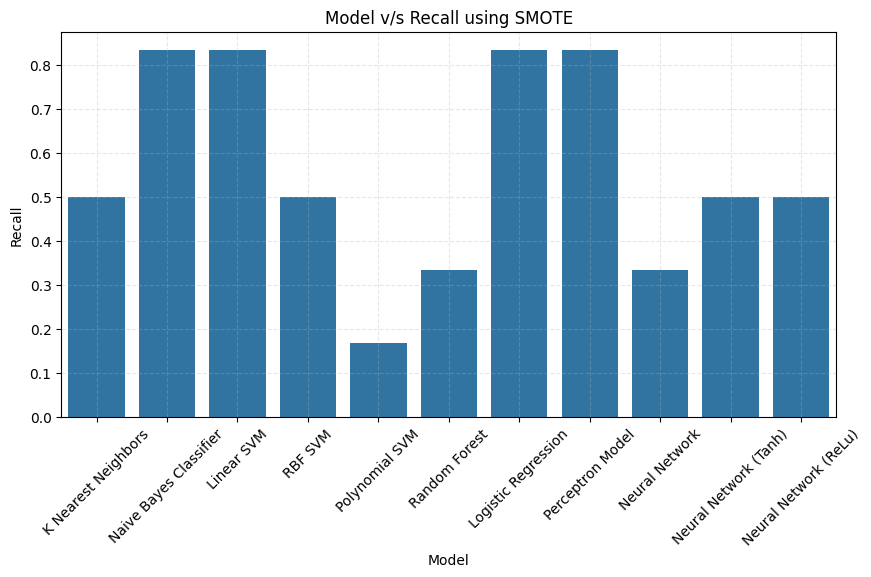

In [66]:
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=recall_smote)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.3)
plt.title("Model v/s Recall using SMOTE")
plt.xlabel("Model")
plt.ylabel("Recall")

Text(0, 0.5, 'Recall')

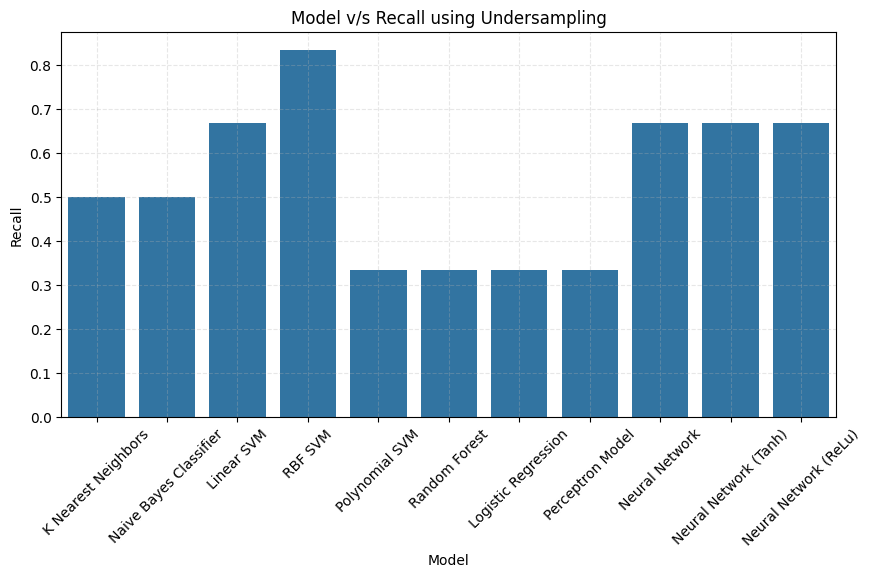

In [67]:
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=recall_undersampling)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.3)
plt.title("Model v/s Recall using Undersampling")
plt.xlabel("Model")
plt.ylabel("Recall")

Text(0, 0.5, 'Recall')

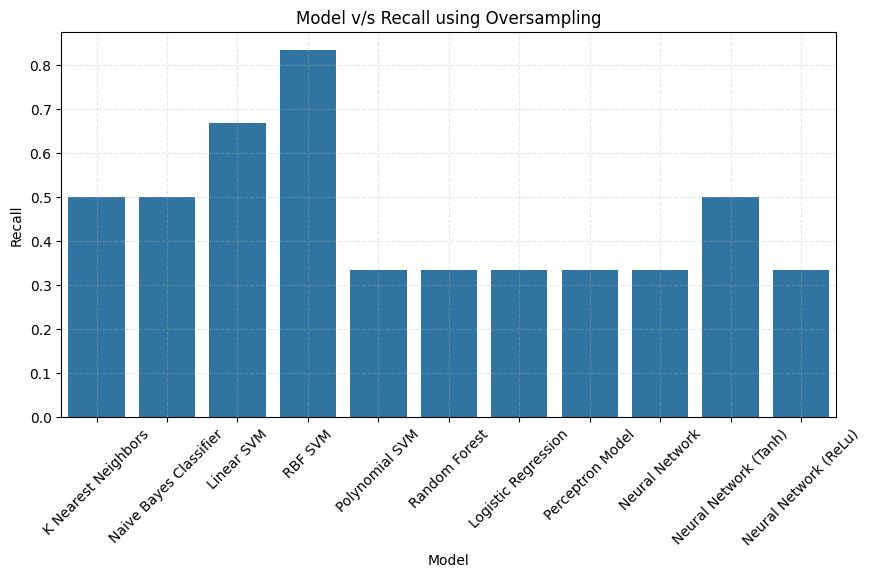

In [68]:
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=recall_oversampling)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.3)
plt.title("Model v/s Recall using Oversampling")
plt.xlabel("Model")
plt.ylabel("Recall")

Text(0, 0.5, 'F1-Score')

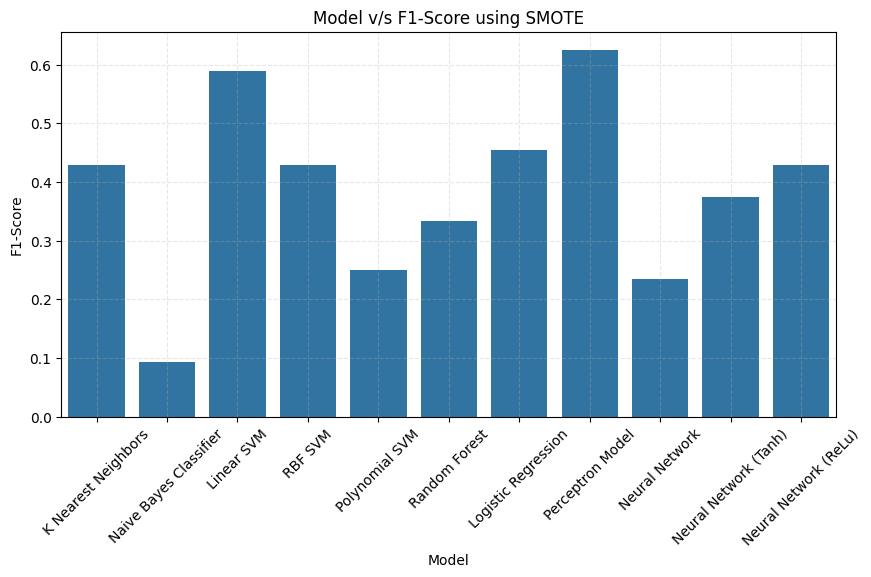

In [69]:
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=f1_smote)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.3)
plt.title("Model v/s F1-Score using SMOTE")
plt.xlabel("Model")
plt.ylabel("F1-Score")

Text(0, 0.5, 'F1-Score')

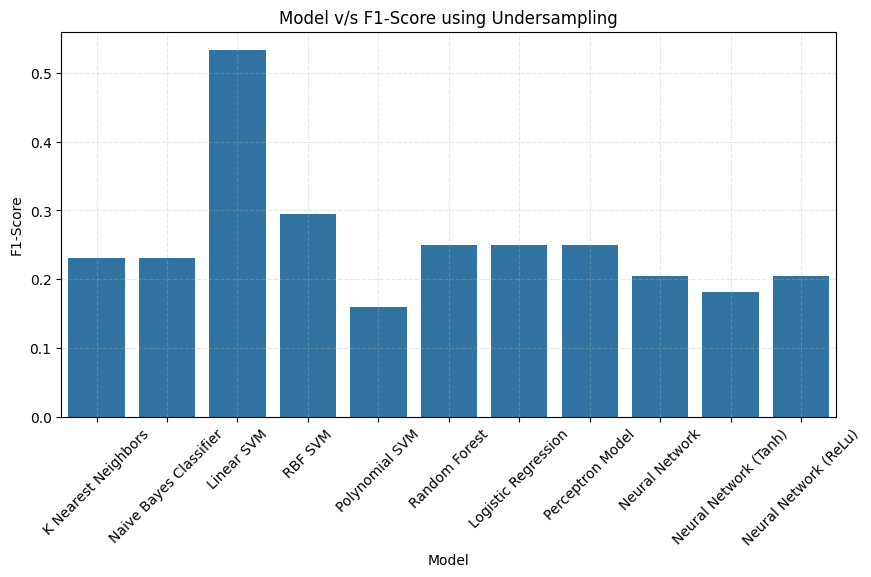

In [70]:
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=f1_undersampling)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.3)
plt.title("Model v/s F1-Score using Undersampling")
plt.xlabel("Model")
plt.ylabel("F1-Score")

Text(0, 0.5, 'F1-Score')

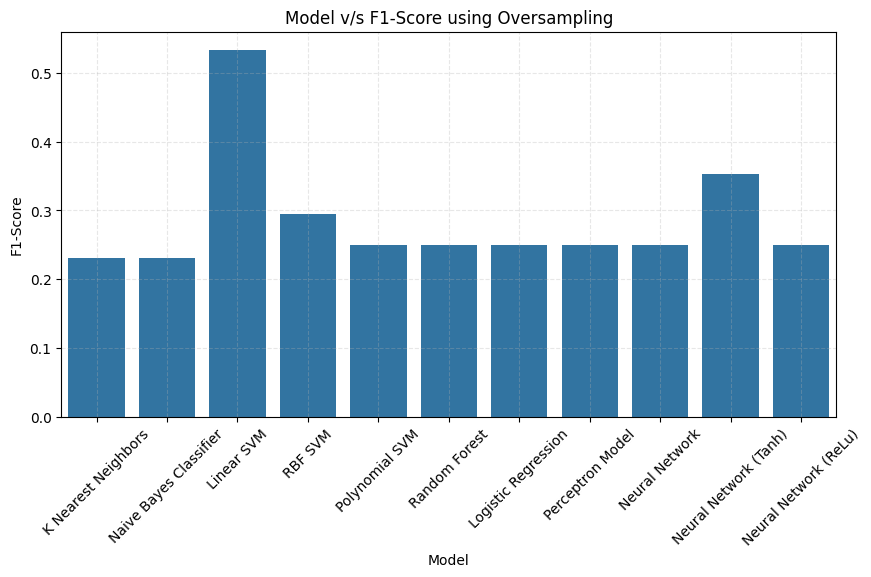

In [71]:
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=f1_oversampling)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.3)
plt.title("Model v/s F1-Score using Oversampling")
plt.xlabel("Model")
plt.ylabel("F1-Score")

Text(0, 0.5, 'EER')

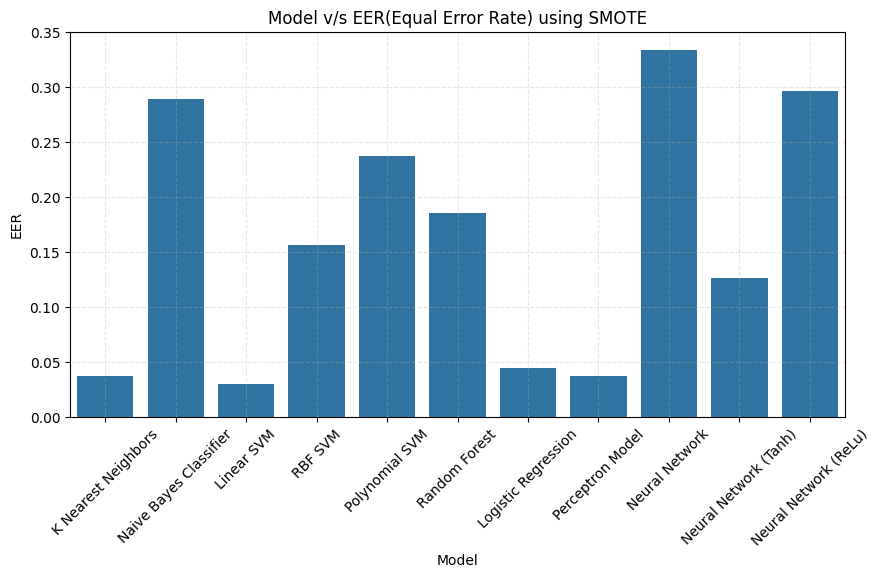

In [72]:
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=eer_smote)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.3)
plt.title("Model v/s EER(Equal Error Rate) using SMOTE")
plt.xlabel("Model")
plt.ylabel("EER")

Text(0, 0.5, 'EER')

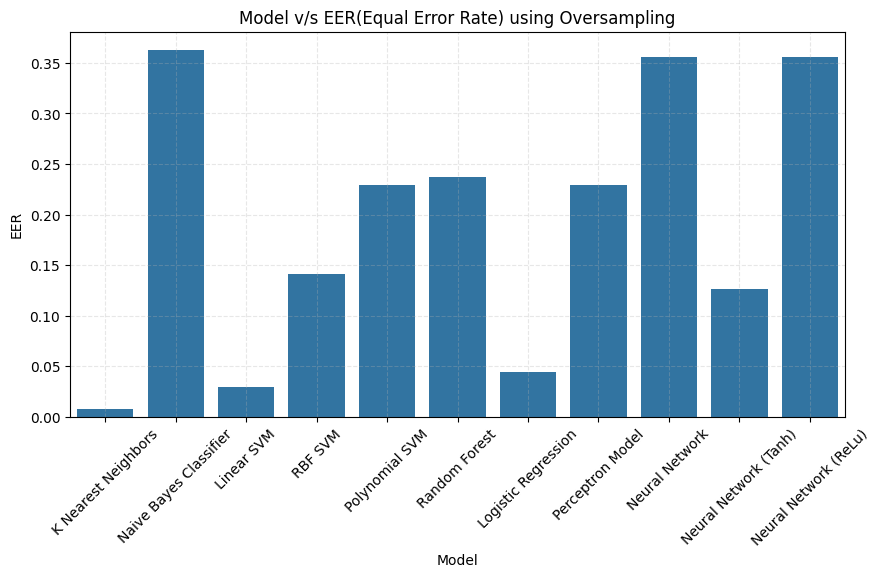

In [73]:
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=eer_oversampling)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.3)
plt.title("Model v/s EER(Equal Error Rate) using Oversampling")
plt.xlabel("Model")
plt.ylabel("EER")

In [ ]:
classificationModels = {}
classificationModels['Model'] = models
classificationModels['Accuracy (SMOTE)'] = accuracy_smote
classificationModels['EER (SMOTE)'] = eer_smote
classificationModels['Accuracy (Undersampling)'] = accuracy_undersampling
classificationModels['EER (Undersampling)'] = eer_undersampling
classificationModels['Accuracy (Oversampling)'] = accuracy_oversampling
classificationModels['EER (Oversampling)'] = eer_oversampling
classificationModels = pd.DataFrame(classificationModels)
classificationModels

,Model,Accuracy (SMOTE),EER (SMOTE),Accuracy (Undersampling),EER (Undersampling),Accuracy (Oversampling),EER (Oversampling)
0,K Nearest Neighbors,94.33,0.037037,85.82,0.259259,85.82,0.007407
1,Naive Bayes Classifier,30.50,0.288889,85.82,0.362963,85.82,0.362963
2,Linear SVM,95.04,0.029630,95.04,0.207407,95.04,0.029630
3,RBF SVM,94.33,0.155556,82.98,0.385185,82.98,0.140741
4,Polynomial SVM,95.74,0.237037,85.11,0.400000,91.49,0.229630
5,Random Forest,94.33,0.185185,91.49,0.340741,91.49,0.237037
6,Logistic Regression,91.49,0.044444,91.49,0.148148,91.49,0.044444
7,Perceptron Model,95.74,0.037037,91.49,0.296296,91.49,0.229630
8,Neural Network,90.78,0.333333,78.01,0.303704,91.49,0.355556
9,Neural Network (Tanh),92.91,0.125926,74.47,0.288889,92.20,0.125926


In [75]:
max_acc = classificationModels['Accuracy (SMOTE)'].max()
best_model = classificationModels[classificationModels['Accuracy (SMOTE)'] == max_acc]
best_model

,Model,Accuracy (SMOTE),EER (SMOTE),Accuracy (Undersampling),EER (Undersampling),Accuracy (Oversampling),EER (Oversampling)
4,Polynomial SVM,95.74,0.237037,85.11,0.400000,91.49,0.22963
7,Perceptron Model,95.74,0.037037,91.49,0.296296,91.49,0.22963


In [76]:
min_eer = classificationModels['EER (SMOTE)'].min()
best_model = classificationModels[classificationModels['EER (SMOTE)'] == min_eer]
best_model

,Model,Accuracy (SMOTE),EER (SMOTE),Accuracy (Undersampling),EER (Undersampling),Accuracy (Oversampling),EER (Oversampling)
2,Linear SVM,95.04,0.02963,95.04,0.207407,95.04,0.02963


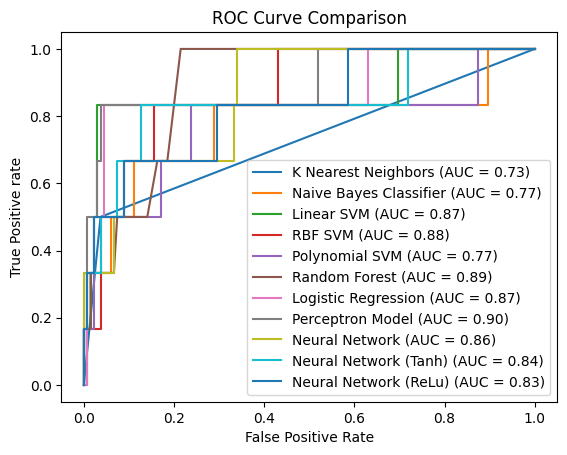

In [77]:
for i in range(0,len(fpr_smote)):
    plt.plot(fpr_smote[i], tpr_smote[i], label=f'{models[i]} (AUC = {auc_smote[i]:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.title("ROC Curve Comparison")
plt.legend(loc='lower right')
plt.show()

## Testing on Best Model (Perceptron)

In [81]:
y_pred = perceptron.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
acc

0.9290780141843972

In [82]:
decision_scores = perceptron.decision_function(X_test_scaled)
y_prob = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
eer = compute_eer(y_test, y_prob)
print(f"EER: {eer}")

EER: 0.11851851851851852


Accuracy: 92.9078
Precision: 0.3000
Recall: 0.5000
F1-score: 0.3750
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       135
           1       0.30      0.50      0.38         6

    accuracy                           0.93       141
   macro avg       0.64      0.72      0.67       141
weighted avg       0.95      0.93      0.94       141



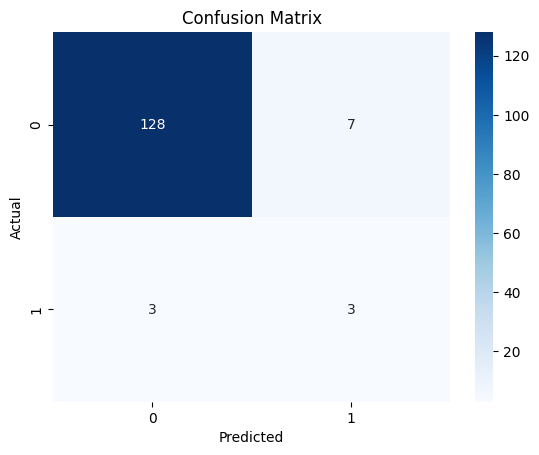

In [83]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {100*acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix')
plt.show()